# OK Cupid data analysis

## Introduction

This project analyzes data from the on-line dating application OKCupid. 

The goal of this project is to scope, clean the data, analyze, and create a machine learning model to solve a few questions.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

### The project is broken down into these four sections:

- #### 1. Project Goals

In this project, the goal is to apply machine learning techniques to a data set to answer some questions. The primary research questions that will be answered are 
- whether an OkCupid's user astrological sign has any correlation to any other data variables in the dataset.
- whether a OKCupid's diet ( strict vs not strict ) has any correlation to any other data variables in the dataset.


- <font color='red'> Can I predict high / low income, based on Astrological Sign?</font>

- <font color='red'> Can I predict whether or not a user has a strict diet, based Astrological Sign?</font>

- <font color='red'> Can I predict Drug Use based on Astrological sign?</font>

- <font color='red'> Can I predict Drug Use based on whether or not a user is a smoker?</font>


- #### 2. Load, Inspect, and Clean the Data 

The data will be loaded into a dataset. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles questions, which include multi-choice and short answer questions. After inspecting the data columns, some columns will need to be cleaned up, so that they can be utilized better.

- #### 3. Analysis

The analysis of the data will include visualization (graphs) to understand the distribution, count, and relationship between variables. Since the goal of the project is to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

- #### 4. Evaluation and Conclusion

The project will conclude with the evaluation of the machine learning models selected with a validation data set. 



### Let's begin ...


## <font color='red'> 1. Project Goals </font>

The goal of this project is to compare OK Cupid users' <font color='red'>astrological signs</font>, and also their <font color='red'>diet habits</font> ( strict vs non-strict ) to other variables in the dataset, to see if any correlation can be made.  Using Machine Learning algorithms, can any predictions be made about future users?

## <font color='red'>  2. Load, Inspect, and Clean the Data </font>

### Import the necessary libraries and modules 

In [221]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import hypothesis-testing methods:
from scipy.stats import ks_2samp, ttest_ind, chi2_contingency

from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from numpy import random
from matplotlib import colormaps

### <font color='red'> Load the Data </font>

#### The data will be loaded into a `DataFrame` called profiles, then printed out, to gain a quick view of how many columns there are, and what data each column holds.

In [222]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
print("How many users: " )
print(len(profiles))
profiles.head(10)

How many users: 
59946


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

### <font color='red'> Inspect the data </font>

#### Data Characteristics

In [223]:
print("The profiles dataset has " + str(profiles.shape[0]) + " rows and " + str(profiles.shape[1]) + " columns. ")

The profiles dataset has 59946 rows and 31 columns. 


#### Print out the name of the 31 columns.

In [224]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


#### The columns are thoroughly inspected, to assess whether or not all columns of data are usable or not. 

In [225]:
# AGE
#pd.set_option("display.max_rows", None)
profiles.age.value_counts()
#profiles.age.head(7)
# Data is usable. However, two of the users listed their age as being over 100. Most users are between 25-29 years old.

age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64

### The other columns were also inspected to assess which columns of data will be usable.

In [226]:
# BODY_TYPE
# pd.set_option("display.max_rows", None)
# profiles.body_type.value_counts()
#profiles.body_type.head(5)
# Data looks clean. There are 12 values: average, fit, athletic, thin, curvy, a little extra, skinny, full figured,
# overweight, jacked, used up, rather not say.   The category with the highest amount is "average", being 24% of the users.

# DIET
# pd.set_option("display.max_rows", None)
#profiles.diet.value_counts()
#profiles.diet.head(55)
#Data needs cleaning, as there are "Nan" values. But, data is usable. There are 18 values listed: mostly anything, anything, 
#strictly anything, mostly vegetarian, mostly other, strictly vegetarian, vegetarian, strictly other, mostly vegan, other, strictly vegan,
#vegan, mostly kosher, mostly halal, strictly halal, strictly kosher, halal, kosher

# DRINKS
# pd.set_option("display.max_rows", None)
#profiles.drinks.value_counts()
#profiles.drinks.tail(55)
#profiles.drinks.head(5)
# Data needs cleaning. Has some "Nan" values. But, data is usable. There are 6 values: socially, rarely, often, not at all,
#very often, and desperately. Only 5% of users listed "not at all".

# DRUGS
#pd.set_option("display.max_rows", None)
# profiles.drugs.tail(55)
#profiles.drugs.value_counts()
# There are 3 values: never, sometimes, often. Data has some "Nan", and needs to be cleaned, but data is usable.

# EDUCATION
# pd.set_option("display.max_rows", None)
# print(len(profiles.education))
# profiles.education.head(5)
# profiles.education.value_counts()
# Data is clean. Not categorical. There are 32 different values. Data looks usable. 62% have graduated from a 2-year college, or higher.

# HEIGHT
# profiles.height.head(5)
# profiles.height.value_counts()
# Data is clean. However, 9 users entered 37" (inches) or less for height. Of these, 7 users answered 26" or less. 
#Data will have to be cleaned.

# ESSAY
#profiles.essay0.head(5)
#profiles.essay1.head(5)
# profiles.essay2.head(5)
# profiles.essay3.head(5)
# profiles.essay4.head(5)
#profiles.essay5.head(5)
#profiles.essay6.head(5)
#profiles.essay7.head(5)
#profiles.essay8.head(5)
#profiles.essay9.head(5)
# These 10 essay columns do not have clean data. Data is not categorical, but is in sentence form. The data may, or may not be usable.

# ETHNICITY
# pd.set_option("display.max_rows", None)
# profiles.ethnicity.head(5)
#profiles.ethnicity.value_counts()
# Data has countless values for this column.  73% (43796 users, out of 59946) listed one of these categories: 
#white, asian, hispanic, black.  54% of users are white. The remaining 27% listed various categories of mixed races. Pacific Islanders
#accounted for less than 1%.

# INCOME
#profiles.income.head(5)
#profiles.income.value_counts()
# Data not clean. 80% of the income is listed as "-1" for value. Data might not be usable. 

# JOB
#profiles.job.head(5)
#profiles.job.value_counts()
# Data not clean ( has some Nan ) , but data looks usable. There are 20 different values.

# LAST_ONLINE
#profiles.last_online.head(5)

# LOCATION
#profiles.location.head(5)
profiles.location.value_counts()
# Data looks clean. There are a countless amount of values, but about 51% of users answered "San Francisco, California."

# OFFSPRING
#profiles.offspring.head(5)
#pd.set_option("display.max_rows", None)
#profiles.offspring.value_counts()
# Data not clean. There are 15 different values.

# ORIENTATION
#profiles.orientation.tail(55)
#profiles.orientation.value_counts()
# Data looks clean. There are 3 different values for the orientation column: straight, gay, bisexual. 61% of users identify as straight.

# PETS
#profiles.pets.tail(500)
#profiles.pets.value_counts()
# Data is not yes/no. Data is not categorical.  There are 15 different answers. 

# RELIGION
# pd.set_option("display.max_rows", None)
# profiles.religion.head(500)
#profiles.religion.value_counts()
# Data is not categorical. There are 45 different answers. If the religion column is used, it will take a lot of cleaning first.

# SEX
#profiles.sex.tail(5)
#profiles.sex.value_counts()
#Data is clean. 60% are male. 40% are female.

# SIGN
#profiles.sign.tail(500)
#profiles.sign.value_counts()
#Data not clean. Has lots of "Nan" values. There are 48 unique responses. This will need to be cleaned, and turned in to only 12 
#unique responses, to match the 12 astrological signs.

# SMOKES
#pd.set_option("display.max_rows", None)
#profiles.smokes.tail(500)
#profiles.smokes.value_counts()
#Data is not clean. Has "Nan" values. There are 5 unique values: no, sometimes, when drinking, yes, trying to quit.
#73% do not smoke.

# SPEAKS
# pd.set_option("display.max_rows", None)
# profiles.speaks.tail(500)
# profiles.speaks.value_counts()
# print(profiles.speaks[59877])
# An endless amount of values. This data may, or may not be usable. At least 56% of users are fluent in English

# STATUS
#pd.set_option("display.max_rows", None)
#profiles.status.head(500)
profiles.status.value_counts()
# There are 5 unique status: single, seeing someone, available, married, unknown.  Less than 1% of the registered users on this app 
#are married ( 0.005) 

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64

### What type of variables are in this dataset?

In [227]:
pd.DataFrame(profiles.dtypes)

,0
age,int64
body_type,object
diet,object
drinks,object
drugs,object
education,object
essay0,object
essay1,object
essay2,object
essay3,object


In [228]:
# Summary Statistics for Numerical Variables
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [229]:
# Summary Statistics for Categorical Variables
profiles.describe(include = 'object')

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,54350,51516,48635,43533,49260,...,199,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,12,61,82,529,16,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697


### Is any data missing?

Text(0.5, 1.0, 'Missing values heatmap')

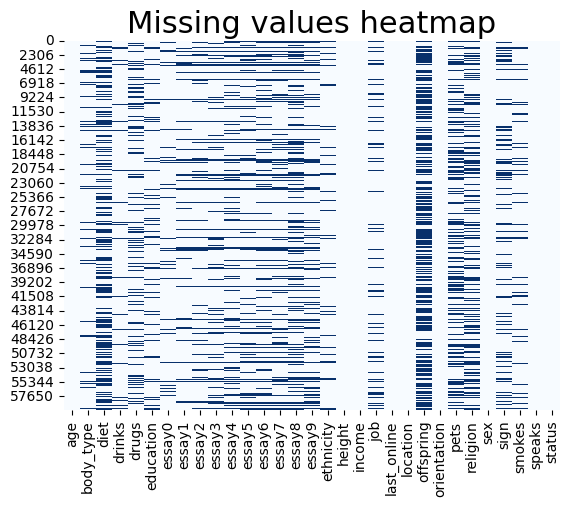

In [230]:
profiles.isnull().sum()
sns.heatmap(profiles.isnull(), cbar = False,  cmap ='Blues').set_title("Missing values heatmap", size = 22)

### Identify missing data in percentages.

In [231]:
maxRows = profiles['age'].count()

In [232]:
print('Percentages of Missing Data:')
print((1 - profiles.count() / maxRows) * 100)

Percentages of Missing Data:
age             0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
orientation     0.000000
pets           33.231575
religion       33.740366
sex             0.000000
sign           18.443266
smokes          9.194942
speaks          0.083408
status          0.000000
dtype: float64


### 59% of users did not answer for the 'offspring' question. Data for that column may be unusable.

In [233]:
# identify missing values of the  columns.
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

#### There is no missing data for these columns: age, income, last_online, location, orientation, sex, and status. There are only 3 instances of missing data for the height column. The rest of the columns have a substantial amount of missing data.

### <font color='red'> Clean the Data </font>

### AGE

#### Before cleaning ...

In [234]:
profiles.age.mean()

32.3402895939679

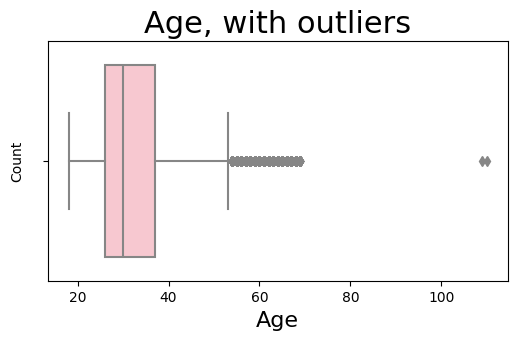

In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.age, color='pink')
plt.xlabel('Age', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
plt.ylabel(ylabel= 'Count', labelpad=10)
plt.title('Age, with outliers', size=22)
plt.show()

#### The current average age is 32.34. There are two outliers in the age column. Since this is a dating app, and the two outliers, for age, are over 100, and elderly people don't tend to use dating apps, let's assume that these were entered erroneously. I will change these two outlier numbers to 26, which is the most common age for users of this app.

In [236]:
profiles.loc[profiles['age']>100,'age']=26

### AGE

#### After cleaning ...

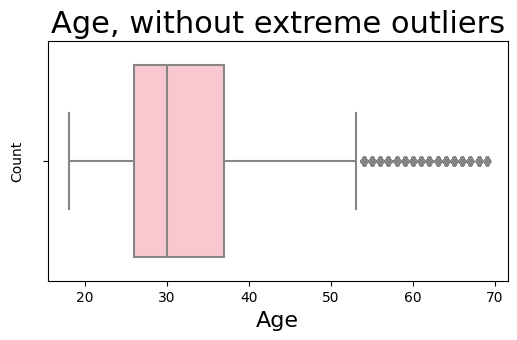

In [237]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.age, color = 'pink')
plt.xlabel('Age', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
plt.ylabel(ylabel= 'Count', labelpad=10)
plt.title('Age, without extreme outliers', size=22)
plt.show()

In [238]:
profiles['age'] = profiles.age.astype(int)

In [239]:
profiles.age.max()

69

#### Now, 69 is the highest age. 

In [240]:
profiles.age.mean()

32.33750375337804

#### 32.33 is now the average age.  The average age has gone down by 1 year since remove those outliers.

### BODY TYPE

In [241]:
print(profiles.body_type.value_counts(dropna=False))

body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


### All 'NaN' values will be changed to 'average', which is the most common answer.

In [242]:
profiles['body_type'] = profiles['body_type'].fillna('average')

In [243]:
print(profiles.body_type.value_counts(dropna=False))

body_type
average           19948
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


### DIET

#### Before cleaning ...

In [244]:
print(profiles.diet.value_counts())

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


#### There are 18 different values for the diet column

In [245]:
print(profiles.diet.tail(10))

59936    mostly anything
59937           anything
59938                NaN
59939                NaN
59940                NaN
59941                NaN
59942    mostly anything
59943    mostly anything
59944    mostly anything
59945                NaN
Name: diet, dtype: object


#### There are a lot of "Nan" values.

Text(0, 0.5, 'diets')

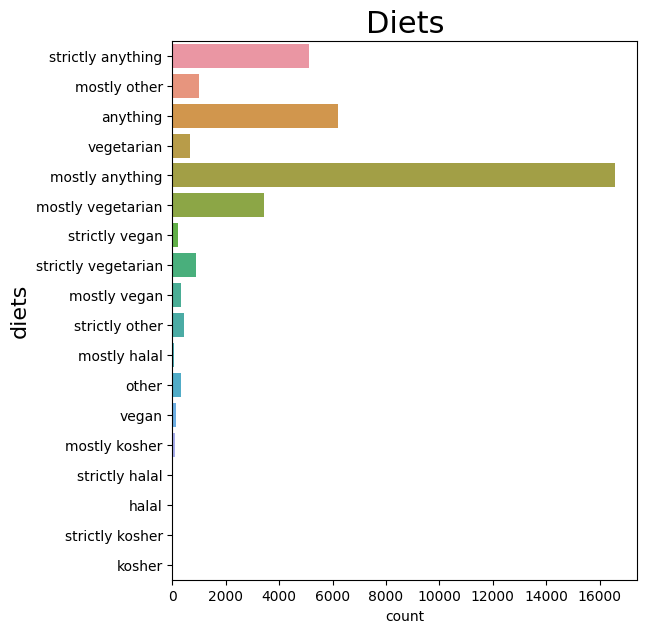

In [246]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="diet");
plt.title("Diets", size = 22)
plt.ylabel("diets", size = 16)

#### There are 18 values for the diet column.  Those with a stricter diet show discipline. I'd like to take that group of users, and compare that data to other variables.  I'm going to separate the vegetarian, vegan, kosher, and halal from the non-vegetarian, non-vegan, non-kosher and non-halal.  Anything with a non-strict diet will be changed to 'other'.  The diet column also includes many "Nan" answers. Those will also be changed to 'others'.

### DIET

#### After cleaning ...

#### Now I will replace all "Nan" values with "other".

In [247]:
profiles.diet.fillna('other', inplace = True)
print(profiles.diet.tail(10))

59936    mostly anything
59937           anything
59938              other
59939              other
59940              other
59941              other
59942    mostly anything
59943    mostly anything
59944    mostly anything
59945              other
Name: diet, dtype: object


#### Now the diet column gets copied to a new column.

In [248]:
profiles['diet_cleaned'] = profiles['diet']
print(profiles.diet_cleaned)

0        strictly anything
1             mostly other
2                 anything
3               vegetarian
4                    other
               ...        
59941                other
59942      mostly anything
59943      mostly anything
59944      mostly anything
59945                other
Name: diet_cleaned, Length: 59946, dtype: object


#### Now the names of the values will be changed, in the new diet_cleaned column, to represent stricter diets vs other, or no special diets.

In [249]:
#The stricter diets

profiles['diet_cleaned'] = profiles['diet'] 
profiles.replace ({'diet_cleaned': {'mostly halal': 'halal'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'mostly kosher': 'kosher'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'mostly vegan': 'vegan'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'mostly vegetarian': 'vegetarian'}}, inplace = True)

profiles.replace ({'diet_cleaned': {'strictly halal': 'halal'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'strictly kosher': 'kosher'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'strictly vegan': 'vegan'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'strictly vegetarian': 'vegetarian'}}, inplace = True)

# The non-strict diets
profiles.replace ({'diet_cleaned': {'mostly anything': 'other'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'mostly other': 'other'}}, inplace = True)
                                             
profiles.replace ({'diet_cleaned': {'strictly anything': 'other'}}, inplace = True)
profiles.replace ({'diet_cleaned': {'strictly other': 'other'}}, inplace = True)

profiles.replace ({'diet_cleaned': {'anything': 'other'}}, inplace = True)

In [250]:
print(profiles.diet_cleaned.tail(20))

59926         other
59927         other
59928         other
59929    vegetarian
59930         other
59931    vegetarian
59932         other
59933         other
59934         other
59935         other
59936         other
59937         other
59938         other
59939         other
59940         other
59941         other
59942         other
59943         other
59944         other
59945         other
Name: diet_cleaned, dtype: object


In [251]:
profiles.diet_cleaned.value_counts()

diet_cleaned
other         54066
vegetarian     4986
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

#### The 18 values have become 5 values, after the cleaning.

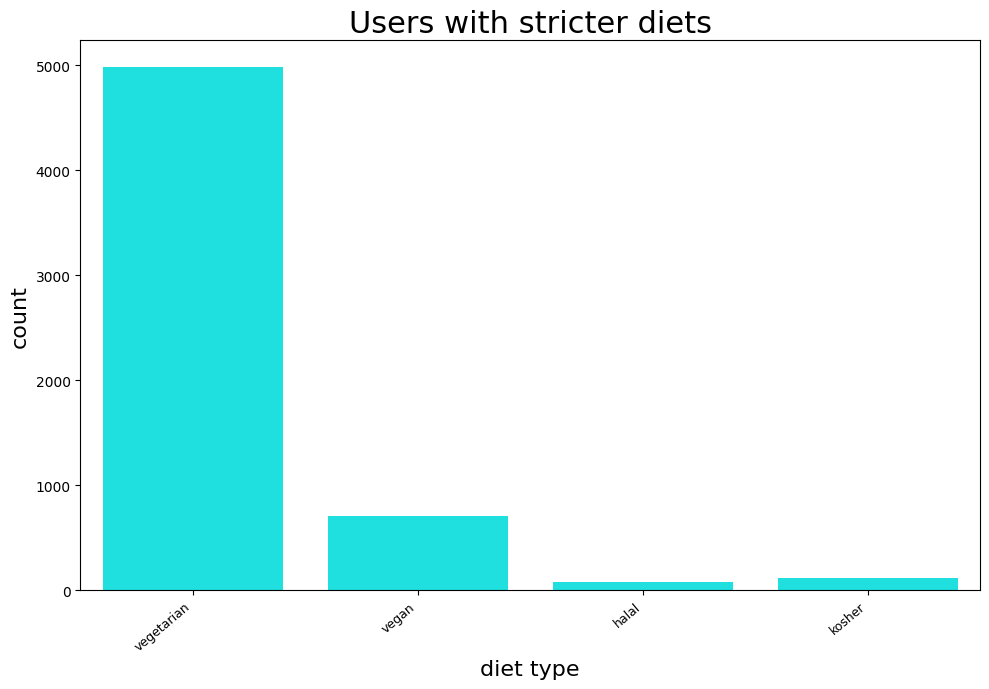

In [252]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=profiles.loc[profiles['diet_cleaned']!="other"], x='diet_cleaned', color='cyan')

plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
ax.set_title('Users with stricter diets', fontsize = 22)
ax.set_xlabel('diet type', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### This graph shows every diet type except "other" ( which encompasses 'strictly anything', 'mostly other', 'anything', 'mostly anything', 'strictly other' and 'other'.

#### The vegan, halal, and kosher values are dwarfed by the vegetarians. Let's remove vegetarian, and just compare the other three values.

In [253]:
profiles['diet_cleaned_twice'] = profiles['diet_cleaned'].replace(['other', 'vegetarian', 'vegan', 'kosher', 'halal'],['0', '1', '2', '3', '4'])

### Change the column type from string to integer.

In [254]:
profiles[['diet_cleaned_twice']] = profiles[['diet_cleaned_twice']].apply(pd.to_numeric)

In [255]:
profiles.diet_cleaned_twice.value_counts()

diet_cleaned_twice
0    54066
1     4986
2      702
3      115
4       77
Name: count, dtype: int64

#### 0 is other, 1 is vegetarian, 2 is vegan, 3 is kosher, and 4 is halal.

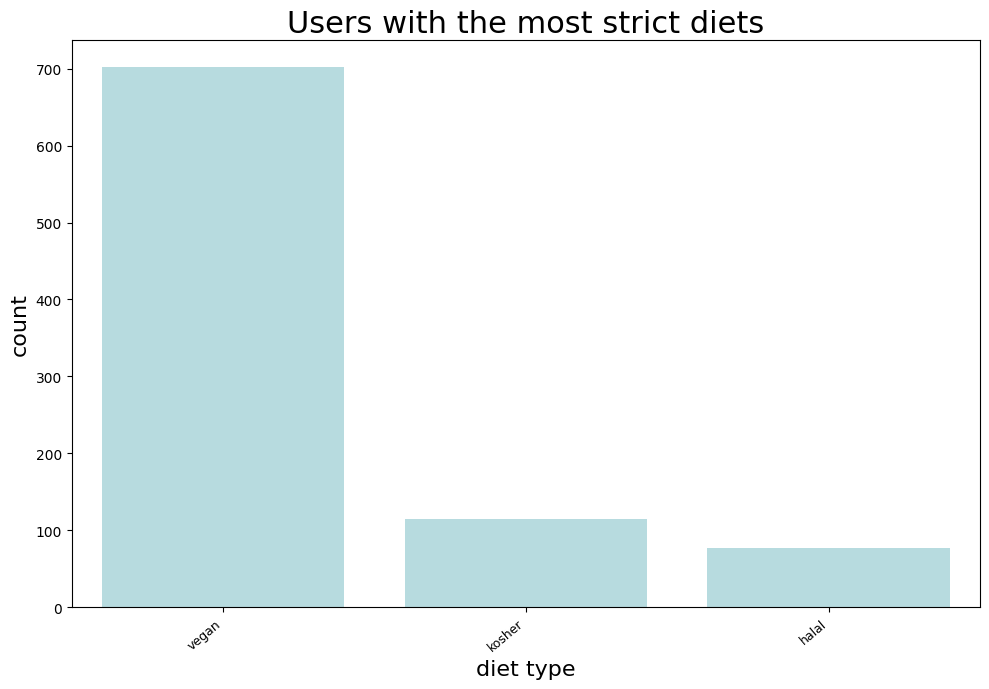

In [256]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=profiles.loc[profiles['diet_cleaned_twice']> 1], x='diet_cleaned_twice', color='powderblue')

diet_labels = ['vegan','kosher','halal']
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
ax.set_title('Users with the most strict diets', fontsize = 22)
ax.set_xlabel('diet type', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)
ax.set_xticklabels(diet_labels, fontsize=9, rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### This graph represents the strictest diets.
#### "other" and "vegetarian" have been removed. 

### Create binary diet column. Now '0' is equal to  not strict with diet habits, and '1' is equal to stricter diet ( vegan, kosher, halal ).

In [257]:
profiles['diet_cleaned_binary'] = profiles['diet_cleaned'].replace(['other', 'vegetarian', 'vegan', 'kosher', 'halal'],['0', '0', '1', '1', '1'])

In [258]:
print(profiles.diet_cleaned_binary.value_counts())

diet_cleaned_binary
0    59052
1      894
Name: count, dtype: int64


### DRINKS

### Before cleaning ...

In [259]:
profiles.drinks.value_counts(dropna = False)

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2985
very often       471
desperately      322
Name: count, dtype: int64

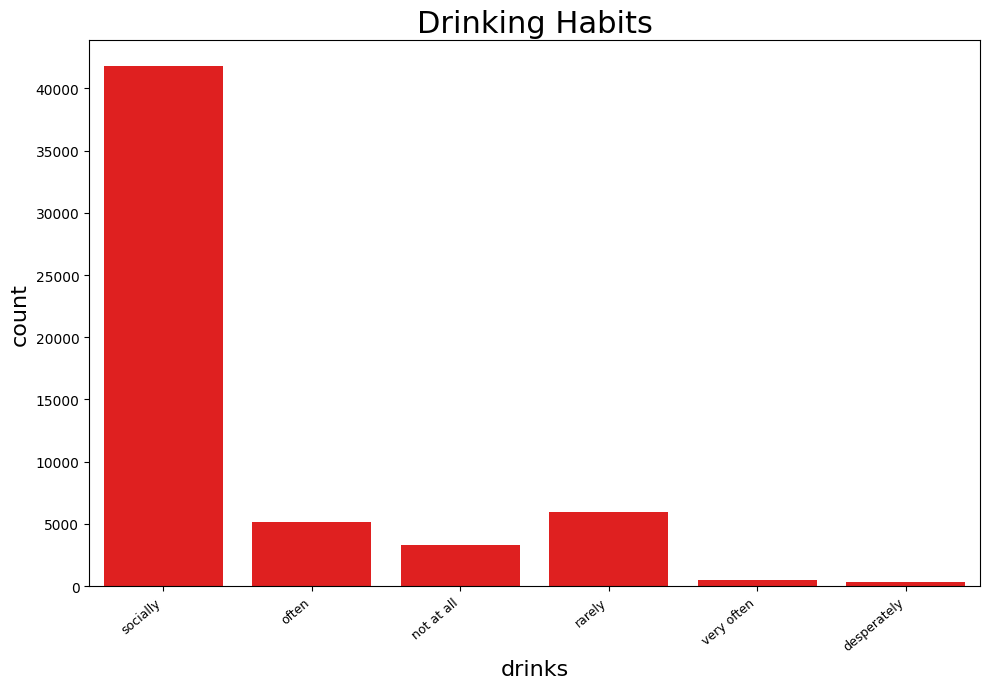

In [260]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=profiles, x='drinks', color='red')

plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
ax.set_title('Drinking Habits', fontsize = 22)
ax.set_xlabel('drinks', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Drinks

### After cleaning ...

In [261]:
profiles['drinks'] = profiles['drinks'].fillna('no_answer')

#### All 'NaN' values have been changed to 'no_answer'.

In [262]:
profiles.drinks.value_counts(dropna=False)

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
no_answer       2985
very often       471
desperately      322
Name: count, dtype: int64

### I will turn this column binary, where the answers will be either yes, or no.

In [263]:
profiles.replace ({'drinks': {'socially': 'yes'}}, inplace = True)
profiles.replace ({'drinks': {'often': 'yes'}}, inplace = True)
profiles.replace ({'drinks': {'not at all': 'no'}}, inplace = True)
profiles.replace ({'drinks': {'rarely': 'no'}}, inplace = True)
profiles.replace ({'drinks': {'very often': 'yes'}}, inplace = True)
profiles.replace ({'drinks': {'desperately': 'yes'}}, inplace = True)

In [264]:
profiles.drinks.value_counts(dropna=False)

drinks
yes          47737
no            9224
no_answer     2985
Name: count, dtype: int64

In [265]:
print(len(profiles.drinks))

59946


In [266]:
47737 / 59946

0.7963333666966937

#### 79 %  of the users are drinkers.

In [267]:
from numpy.random import choice

for i in profiles.drinks:
    
    if i == 'no_answer':
        list2 = ['yes', 'no']
        results = random.choice(list2, len(profiles.drinks), p=[0.79, 0.21])
        
        profiles.replace({'drinks': {'no_answer': results}}, inplace = True )

In [268]:
profiles.drinks.value_counts(dropna=False)

drinks
yes    50067
no      9879
Name: count, dtype: int64

#### All 'no_answer' values have been randomly assigned a 'yes' or 'no' value.    'yes' was weighted at 79 %, and 'no' was weighted at 21 % to match the pre-existing ratio values of yes to no. So, 'yes' was more likely to be randomly chosen than 'no.

In [269]:
profiles['drinks_numeric'] = profiles['drinks'].replace(to_replace=['no', 'yes'], value=[0, 1])

#### 'no' / 'yes' has been replaced with '0' / '1'.  Now 0 is 'no' , and 1 is 'yes'.

### DRUGS

#### Before cleaning ...

In [270]:
profiles.drugs.value_counts(dropna = False)

drugs
never        37724
NaN          14080
sometimes     7732
often          410
Name: count, dtype: int64

In [271]:
14080 / 59946

0.23487805691789276

### 23% of the answers for drugs is blank.  All 'NaN' will be changed to 'no_answer'.

### DRUGS

#### After cleaning ...

In [272]:
profiles['drugs'] = profiles['drugs'].fillna('no_answer')

In [273]:
profiles.drugs.value_counts(dropna = False)

drugs
never        37724
no_answer    14080
sometimes     7732
often          410
Name: count, dtype: int64

### NaN values have been changed to no_answer.

In [274]:
profiles.replace ({'drugs': {'never': 'no'}}, inplace = True)
profiles.replace ({'drugs': {'sometimes': 'yes'}}, inplace = True)
profiles.replace ({'drugs': {'often': 'yes'}}, inplace = True)

In [275]:
profiles.drugs.value_counts(dropna = False)

drugs
no           37724
no_answer    14080
yes           8142
Name: count, dtype: int64

In [276]:
print(len(profiles.drugs))

59946


In [277]:
37724 / 59946

0.6292997030660928

### 'no' was answered 63 % of the time.

### Now, 'no_answer' will be randomly changed to either 'yes' or 'no'.

In [278]:
from numpy.random import choice
list1 = ['yes', 'no']

for i in profiles.drugs:
    
    if i == 'no_answer':
        list1 = ['yes', 'no']
        results = random.choice(list1, len(profiles.drugs), p=[0.37, 0.63])
        
        profiles.replace({'drugs': {'no_answer': results}}, inplace = True )

In [279]:
profiles.drugs.value_counts(dropna = False)

drugs
no     46588
yes    13358
Name: count, dtype: int64

### All 'no_answer' values have been imputated to randomly be 'yes' or 'no'.  But, 'no' was weighted at 63% and 'yes' was weighted at '37%. So, 'no' was much more likely to be randomly chosen.

In [280]:
profiles['drugs_numeric'] = profiles['drugs'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [281]:
profiles.drugs_numeric.value_counts(dropna = False)

drugs_numeric
0    46588
1    13358
Name: count, dtype: int64

#### 'yes' / 'no' has been changed to '0' / '1'.   Now, 0 is 'no' , and 1 is 'yes'.

### ESSAYS

### The essay columns will be dropped from the dataframe. This data is unusable.

In [282]:
profiles.drop('essay0', axis=1, inplace = True)

In [283]:

profiles.drop('essay1', axis=1, inplace = True)

In [284]:
profiles.drop('essay2', axis=1, inplace = True)

In [285]:
profiles.drop('essay3', axis=1, inplace = True)

In [286]:
profiles.drop('essay4', axis=1, inplace = True)

In [287]:
profiles.drop('essay5', axis=1, inplace = True)

In [288]:
profiles.drop('essay6', axis=1, inplace = True)

In [289]:
profiles.drop('essay7', axis=1, inplace = True)

In [290]:
profiles.drop('essay8', axis=1, inplace = True)

In [291]:
profiles.drop('essay9', axis=1, inplace = True)

In [292]:
pd.DataFrame(profiles.dtypes)

,0
age,int64
body_type,object
diet,object
drinks,object
drugs,object
education,object
ethnicity,object
height,float64
income,int64
job,object


### HEIGHT

#### Before cleaning ...

In [293]:
print(profiles.height.value_counts())

height
70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: count, dtype: int64


In [294]:
print("The average height of users is " + str(round(profiles.height.mean(), 2)) + " inches.")

The average height of users is 68.3 inches.


#### There are 3 missing values for the height column. Those will need to be filled in. 

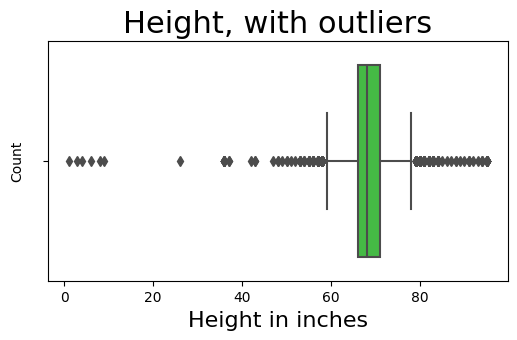

In [295]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.height, color = 'limegreen')
plt.xlabel('Height in inches', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
plt.ylabel(ylabel= 'Count', labelpad=10)
plt.title('Height, with outliers', size=22)
plt.show()

In [296]:
print(profiles.height.mean())

68.29528051649066


#### There were a lot of answers that were less than 54 inches( 4 1/2 feet tall). Some users even entered answers that were less than a foot tall. I'm gonna assume those answers were typos. Anything 54 inches or less will be changed to 70 inches, which is the most common answer. There were also some answers that were over 84 inches (7 feet tall.) Anything 84 inches or taller will be changed to 70 inches.

### HEIGHT

#### After cleaning ...

In [297]:
profiles['height'].fillna(profiles['height'].mode()[0], inplace=True)

In [298]:
# identify missing values of the  columns.
profiles.isnull().sum()

age                        0
body_type                  0
diet                       0
drinks                     0
drugs                      0
education               6628
ethnicity               5680
height                     0
income                     0
job                     8198
last_online                0
location                   0
offspring              35561
orientation                0
pets                   19921
religion               20226
sex                        0
sign                   11056
smokes                  5512
speaks                    50
status                     0
diet_cleaned               0
diet_cleaned_twice         0
diet_cleaned_binary        0
drinks_numeric             0
drugs_numeric              0
dtype: int64

#### The three empty values have been replaced with the "mode" of the column values, which in this case was 70 inches. ( The "mode" is the value the most people entered as their answer.)

In [299]:
profiles.loc[profiles['height']<55,'height']=70
profiles.loc[profiles['height']>83,'height']=70

In [300]:
print(profiles.height.mean())

68.30077069362426


### The extreme outliers have been changed to 70. Any answer less than 55 ( 4 feet 7 inches ) , and any answer taller than 83 ( 6 feet 11 inches ) was changed to 70, which is the most common answer among users.

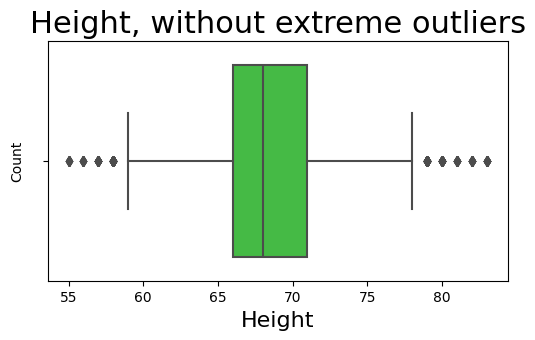

In [301]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.height, color = 'limegreen')
plt.xlabel('Height', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
plt.ylabel(ylabel= 'Count', labelpad=10)
plt.title('Height, without extreme outliers', size=22)
plt.show()

In [302]:
print(profiles.height.max())

83.0


In [303]:
print(profiles.height.min())

55.0


In [304]:
print(profiles.height.mean())

68.30077069362426


In [305]:
profiles.height.dtype

dtype('float64')

In [306]:
print(profiles['height'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
59941    False
59942    False
59943    False
59944    False
59945    False
Name: height, Length: 59946, dtype: bool


In [307]:
profiles.height.value_counts(dropna=False)

height
70.0    6160
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
57.0      17
83.0      12
81.0      11
82.0      11
56.0       8
55.0       6
Name: count, dtype: int64

In [308]:
# Change data type from float to int.
profiles['height'] = profiles['height'].apply(int)

In [309]:
profiles.height.dtype

dtype('int64')

#### Now the tallest height is 6.9 feet.  The shortest height is 4.5 feet.  Average height barely changed after removing the extreme outliers. Average height has gone from 68.295 to 68.30

### INCOME

#### Before cleaning ...

In [310]:
print(profiles.income.tail(10))

59936        -1
59937        -1
59938        -1
59939        -1
59940        -1
59941        -1
59942        -1
59943    100000
59944        -1
59945        -1
Name: income, dtype: int64


#### The Income column has lots of "-1".  This will need to change to "0".

In [316]:
print(str(profiles.income).isdigit())

False


### INCOME

#### After cleaning ...

In [317]:
profiles.loc[profiles['income']<0,'income']=0

In [318]:
print(profiles.income.tail(10))

59936         0
59937         0
59938         0
59939         0
59940         0
59941         0
59942         0
59943    100000
59944         0
59945         0
Name: income, dtype: int64


In [319]:
profiles.income.dtype

dtype('int64')

In [320]:
print(str(profiles.income).isdigit())

False


#### "-1" values, for income, have all been changed to 0.

### Turn income column binary. 

#### If income is less than 30,000, then that will be replaced with '0', for "not wealthy".  If income is greater than 30,000 
#### then income will be replaced with '1', for "wealthy".  Note that since very few people answered the question on what their income is, 
#### and most people answer zero, in this dataset, greater than $30,000 is a large income.

In [321]:
print(profiles.income.value_counts())

income
0          48442
20000       2952
100000      1621
80000       1111
30000       1048
40000       1005
50000        975
60000        736
70000        707
150000       631
1000000      521
250000       149
500000        48
Name: count, dtype: int64


In [322]:
profiles['income_binary'] = np.where(profiles['income'] < 30000, 0, 1)

In [324]:
print(profiles.income_binary.value_counts())

income_binary
0    51394
1     8552
Name: count, dtype: int64


### OFFSPRING

### Before cleaning ...

In [325]:
profiles.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

In [326]:
profiles['offspring'] = profiles['offspring'].str.replace('doesn&rsquo;t', "doesn't")

Text(0.5, 0, 'Count')

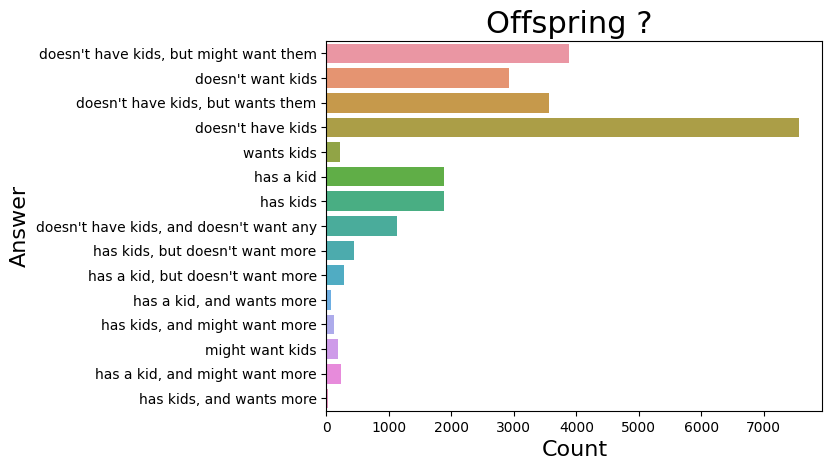

In [327]:
sns.countplot(data=profiles, y="offspring")
plt.title("Offspring ? ", size = 22)
plt.ylabel("Answer", size = 16)
plt.xlabel("Count", size = 16)

In [328]:
profiles['offspring'].value_counts(dropna = False)

offspring
NaN                                        35561
doesn't have kids                           7560
doesn't have kids, but might want them      3875
doesn't have kids, but wants them           3565
doesn't want kids                           2927
has kids                                    1883
has a kid                                   1881
doesn't have kids, and doesn't want any     1132
has kids, but doesn't want more              442
has a kid, but doesn't want more             275
has a kid, and might want more               231
wants kids                                   225
might want kids                              182
has kids, and might want more                115
has a kid, and wants more                     71
has kids, and wants more                      21
Name: count, dtype: int64

In [329]:
35561 / 59946

0.5932172288392887

#### 59% of the answers for the offspring variable were unanswered. So, this offspring data is unusable.

### SEX

In [330]:
print(profiles.sex.value_counts())

sex
m    35829
f    24117
Name: count, dtype: int64


### SIGN

#### Before cleaning ...

#### There are 48 unique answers for the sign column, but there should only be 12, one for each astrological sign. 

In [331]:
print("Number of categories of astrological signs:",profiles.sign.nunique())
print('\n')
print("categories:", profiles.sign.unique())

Number of categories of astrological signs: 48


categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t 

### SIGN

#### After cleaning ...

In [332]:
profiles['signs_cleaned'] = profiles.sign.str.split(" ").str.get(0)
#profiles['signs_cleaned'] = profiles.sign.str.split().str.get(0)
print("number of categories:",profiles.signs_cleaned.nunique())
print("categories:", profiles.signs_cleaned.unique())

profiles.signs_cleaned.value_counts()

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signs_cleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

#### Now there are only 12 signs.

In [333]:
profiles['signs_numeric'] = profiles['signs_cleaned'].replace(to_replace=['leo', 'gemini', 'libra', 'cancer', 'virgo', 'taurus', 'scorpio', 'aries', 'pisces', 'sagittarius', 'aquarius', 'capricorn' ], value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [334]:
profiles.signs_numeric.value_counts(dropna = False)

signs_numeric
NaN     11056
0.0      4374
1.0      4310
2.0      4207
3.0      4206
4.0      4141
5.0      4140
6.0      4134
7.0      3989
8.0      3946
9.0      3942
10.0     3928
11.0     3573
Name: count, dtype: int64

In [335]:
profiles['signs_numeric'].fillna(13, inplace=True)

In [336]:
profiles.signs_numeric.value_counts(dropna = False)

signs_numeric
13.0    11056
0.0      4374
1.0      4310
2.0      4207
3.0      4206
4.0      4141
5.0      4140
6.0      4134
7.0      3989
8.0      3946
9.0      3942
10.0     3928
11.0     3573
Name: count, dtype: int64

#### Signs_cleaned has been changed to numeric values. Now ...

#### leo = 0
#### gemini = 1 
#### libra = 2 
#### cancer = 3 
#### virgo = 4 
#### taurus = 5 
#### scorpio = 6 
#### aries = 7 
#### pisces = 8 
#### sagittarius = 9 
#### aquarius = 10
#### capricorn = 11
#### no_answer = 13

In [337]:
display(profiles.dtypes)

age                      int64
body_type               object
diet                    object
drinks                  object
drugs                   object
education               object
ethnicity               object
height                   int64
income                   int64
job                     object
last_online             object
location                object
offspring               object
orientation             object
pets                    object
religion                object
sex                     object
sign                    object
smokes                  object
speaks                  object
status                  object
diet_cleaned            object
diet_cleaned_twice       int64
diet_cleaned_binary     object
drinks_numeric           int64
drugs_numeric            int64
income_binary            int64
signs_cleaned           object
signs_numeric          float64
dtype: object

In [338]:
profiles['signs_numeric'] = profiles['signs_numeric'].astype('int64')

### SMOKES

#### Before cleaning ...

In [339]:
print("There are " + str(profiles.smokes.nunique()) + " unique answers for the 'smokes' column.")

There are 5 unique answers for the 'smokes' column.


In [340]:
print(profiles.smokes.tail(30))

59916                no
59917                no
59918               yes
59919               NaN
59920                no
59921               NaN
59922                no
59923         sometimes
59924                no
59925                no
59926                no
59927                no
59928     when drinking
59929                no
59930                no
59931                no
59932               yes
59933               NaN
59934                no
59935     when drinking
59936                no
59937                no
59938               NaN
59939                no
59940                no
59941                no
59942                no
59943                no
59944    trying to quit
59945         sometimes
Name: smokes, dtype: object


#### Those answers are: yes, no, sometimes, when drinking, trying to quit.

In [341]:
print(profiles.smokes[59938])

nan


#### User 59938 has "Nan" as a value.  
#### There are also many other "Nan" answers for other users.

### SMOKES

#### After cleaning ...

In [342]:
profiles.smokes.value_counts(dropna=False)

smokes
no                43896
NaN                5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

#### First I will change all "NaN" answers to "no_answer".

In [343]:
profiles['smokes'] = profiles['smokes'].fillna('no_answer')

In [344]:
profiles.smokes.value_counts(dropna=False)

smokes
no                43896
no_answer          5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

#### "Nan" answers have been changed to "no". Now I will change all answers to a binary, where the answers are either "yes" or "no".

In [345]:
profiles.replace ({'smokes': {'sometimes': 'yes'}}, inplace = True)
profiles.replace ({'smokes': {'when drinking': 'yes'}}, inplace = True)
profiles.replace ({'smokes': {'trying to quit': 'yes'}}, inplace = True)

In [346]:
profiles.smokes.value_counts(dropna=False)

smokes
no           43896
yes          10538
no_answer     5512
Name: count, dtype: int64

In [347]:
print(profiles.smokes[59938])

no_answer


#### The cleaning worked. Now user 59938 has an answer of 'no_answer'.

In [348]:
print(len(profiles.smokes))

59946


In [349]:
43896 / 59946

0.7322590331298169

### 73 % of users said 'no' to smoking.

### Now 'no_answer' will be randomly changed to 'yes' or 'no'.

In [350]:
from numpy.random import choice
list3 = ['yes', 'no']

for i in profiles.smokes:
    
    if i == 'no_answer':
        list3 = ['yes', 'no']
        results = random.choice(list3, len(profiles.smokes), p=[0.27, 0.73])
        
        profiles.replace({'smokes': {'no_answer': results}}, inplace = True )

#### 'no_answer' has been randomly changed to yes or no. 'yes' was weighted at 27 % and 'no' was weighted at 73 %. This means that 'no' was more likely to be randomly chosen.

In [351]:
print(profiles.smokes.value_counts())

smokes
no     47969
yes    11977
Name: count, dtype: int64


#### Now there are only two values for SMOKES. ( yes / no )

In [352]:
profiles['smokes_numeric'] = profiles['smokes'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [353]:
print(profiles.smokes_numeric.value_counts())

smokes_numeric
0    47969
1    11977
Name: count, dtype: int64


#### 'no' / 'yes' has been changed to '0' / '1'. Now 0 is 'no', and 1 is 'yes'.

## <font color='red'>  3. Analysis </font>

### AGE

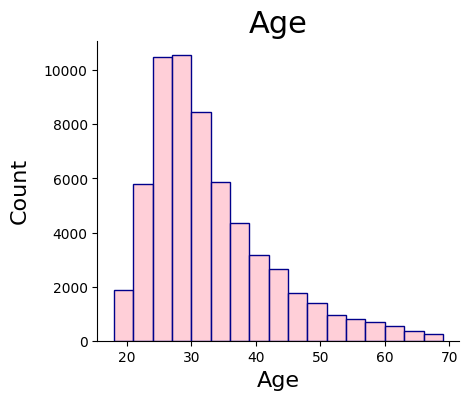

In [354]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 3, color = 'pink', edgecolor = 'darkblue');
plt.xlabel('Age', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.7)
plt.ylabel(ylabel= 'Count',  fontsize=16, labelpad=10)
plt.title('Age', size=22)
plt.show()

In [355]:
profiles.age.value_counts()

age
26    3726
27    3685
28    3583
25    3531
29    3295
24    3242
30    3149
31    2735
23    2592
32    2587
33    2206
22    1934
34    1902
35    1755
36    1583
37    1427
38    1330
21    1282
39    1172
42    1072
40    1030
41     980
20     953
43     858
44     708
45     643
19     611
46     578
47     529
48     481
49     459
50     437
51     350
52     344
18     309
56     271
54     267
55     265
57     256
53     252
59     221
58     197
60     195
61     176
62     167
63     138
64     113
65     109
66     105
67      66
68      59
69      31
Name: count, dtype: int64

In [356]:
profiles.age.mean()

32.33750375337804

In [357]:
profiles.age.mode()

0    26
Name: age, dtype: int64

#### The most common age of users is 26 years old. The average age is 32.33.

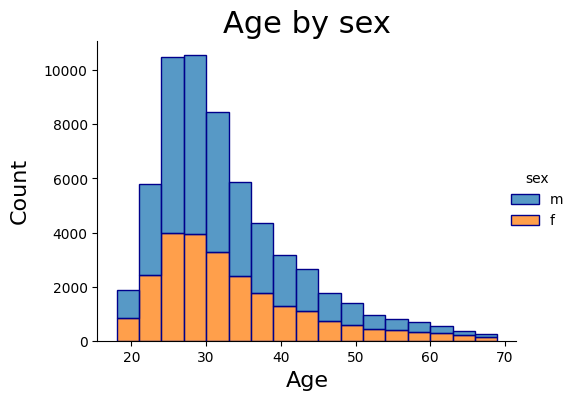

In [358]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 3, multiple = "stack", edgecolor = 'darkblue');
plt.xlabel('Age', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.7)
plt.ylabel(ylabel= 'Count',  fontsize=16, labelpad=10)
plt.title('Age by sex', size=22)
plt.show()

#### There are more males than females. The distribution, of age, by sex, is about equal though.

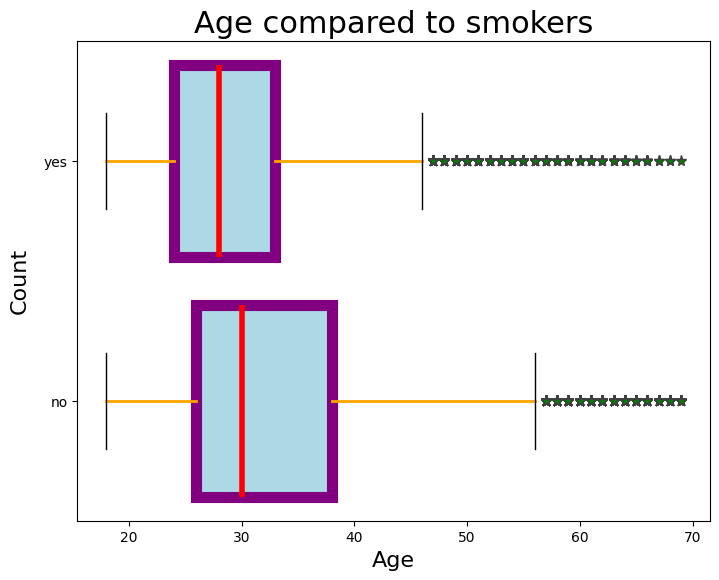

In [368]:
#plt.figure to change size of the graph
plt.figure(figsize=(11, 12))

boxplot_style = {
    'whiskerprops': {'linewidth': 2, 'color': 'orange'},
    'medianprops': {'linewidth': 4, 'color': 'red'},
    'flierprops': {'marker': '*', 'markerfacecolor': 'green', 'markersize': 8},
    'boxprops': {'facecolor': 'lightblue', 'edgecolor': 'purple', 'linewidth': 8},
    'capprops': {'color': 'black', 'linewidth': 1}
}

sns.boxplot(x="age", y="smokes", data=profiles,**boxplot_style)

plt.xlabel('Age', fontsize=16)
plt.subplots_adjust(bottom=0.1, right=0.7, top=0.5)
plt.ylabel(ylabel= 'Count', labelpad=10, size = 16)
plt.title('Age compared to smokers', size=22)

plt.show()

### The average age of users who are smokers is 26. Most smokers are between 25 to 33 years old.

In [369]:
# For ease in later plotting, separate males and females into their own DataFrames:
male_data = profiles[profiles.sex == 'm']
female_data = profiles[profiles.sex == 'f']

### Question: Is there a relationship between gender and age of users?
### Null hypothesis: There is not a relationship between gender and age of users.

In [370]:
ksstat_mf, kspval_mf = ks_2samp(male_data.smokes,female_data.smokes)
print('Kolmogorov–Smirnov ( KS test )  - p-value for male and female vs smoking habit: '+ str(kspval_mf))

Kolmogorov–Smirnov ( KS test )  - p-value for male and female vs smoking habit: 2.0825621106073573e-14


#### p-value is less than 0.01, so we reject the null hypothesis. That means that there is a relationship between gender and age of users.

### DIET

In [371]:
profiles['smokes'] = profiles['smokes'].fillna('no')

In [372]:
print(profiles.diet.value_counts(dropna='False'))

diet
other                  24726
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


In [373]:
profiles.diet_cleaned.info

<bound method Series.info of 0             other
1             other
2             other
3        vegetarian
4             other
            ...    
59941         other
59942         other
59943         other
59944         other
59945         other
Name: diet_cleaned, Length: 59946, dtype: object>

In [374]:
profiles.diet_cleaned_twice.value_counts()

diet_cleaned_twice
0    54066
1     4986
2      702
3      115
4       77
Name: count, dtype: int64

### I will now plot 1, 2, 3, and 4 ("vegetarian", "vegan", "kosher", "halal") to compare those diets to astrological signs.

<Figure size 640x480 with 0 Axes>

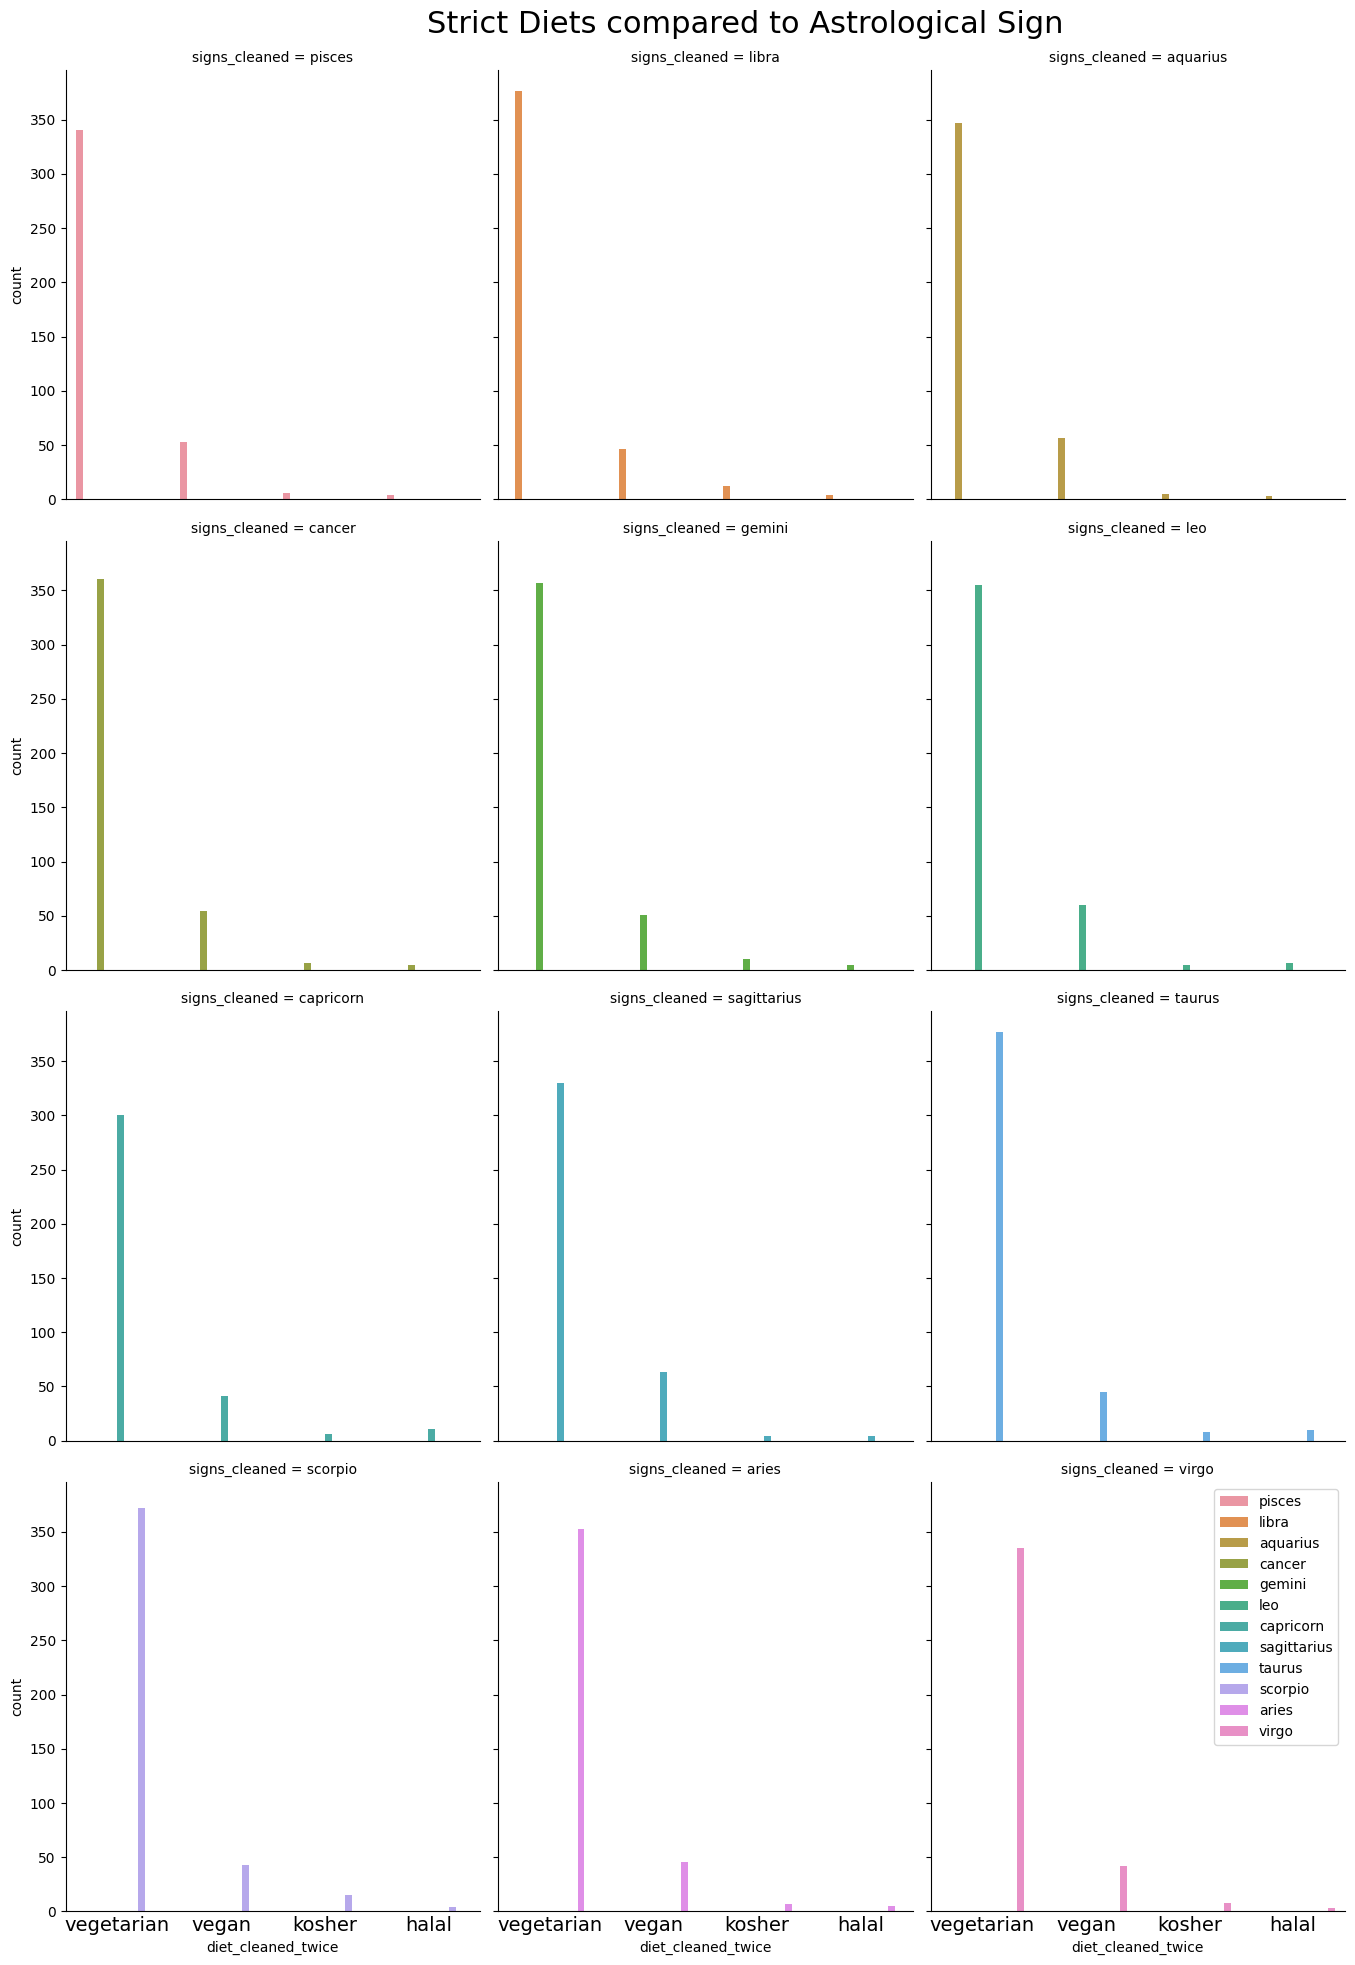

In [375]:
diet_labels = ["vegetarian", "vegan","kosher","halal"]


plt.subplots_adjust(hspace=0.5)
ax = sns.catplot(data=profiles.loc[profiles['diet_cleaned_twice']> 0], x="diet_cleaned_twice", hue="signs_cleaned", col="signs_cleaned", kind = 'count', col_wrap=3)

# Remove x tick marks
ax.tick_params(axis='x', length=0)
ax.set_xticklabels(diet_labels, size = 14)
plt.ylabel(ylabel= 'signs',  fontsize=18)
plt.suptitle("Strict Diets compared to Astrological Sign", size=22)

ax.fig.subplots_adjust(top=0.95,right=0.9) 

plt.legend()
plt.show()

#### Libra and Taurus are tied for most-likely-to-be-vegetarian.

#### Capricorn is least-likely-to-be vegetarian.

### Now I want to look at the strictest diets. I will only plot 2, 3, and 4 ("vegan", "kosher", "halal") to compare those diets to astrological signs.

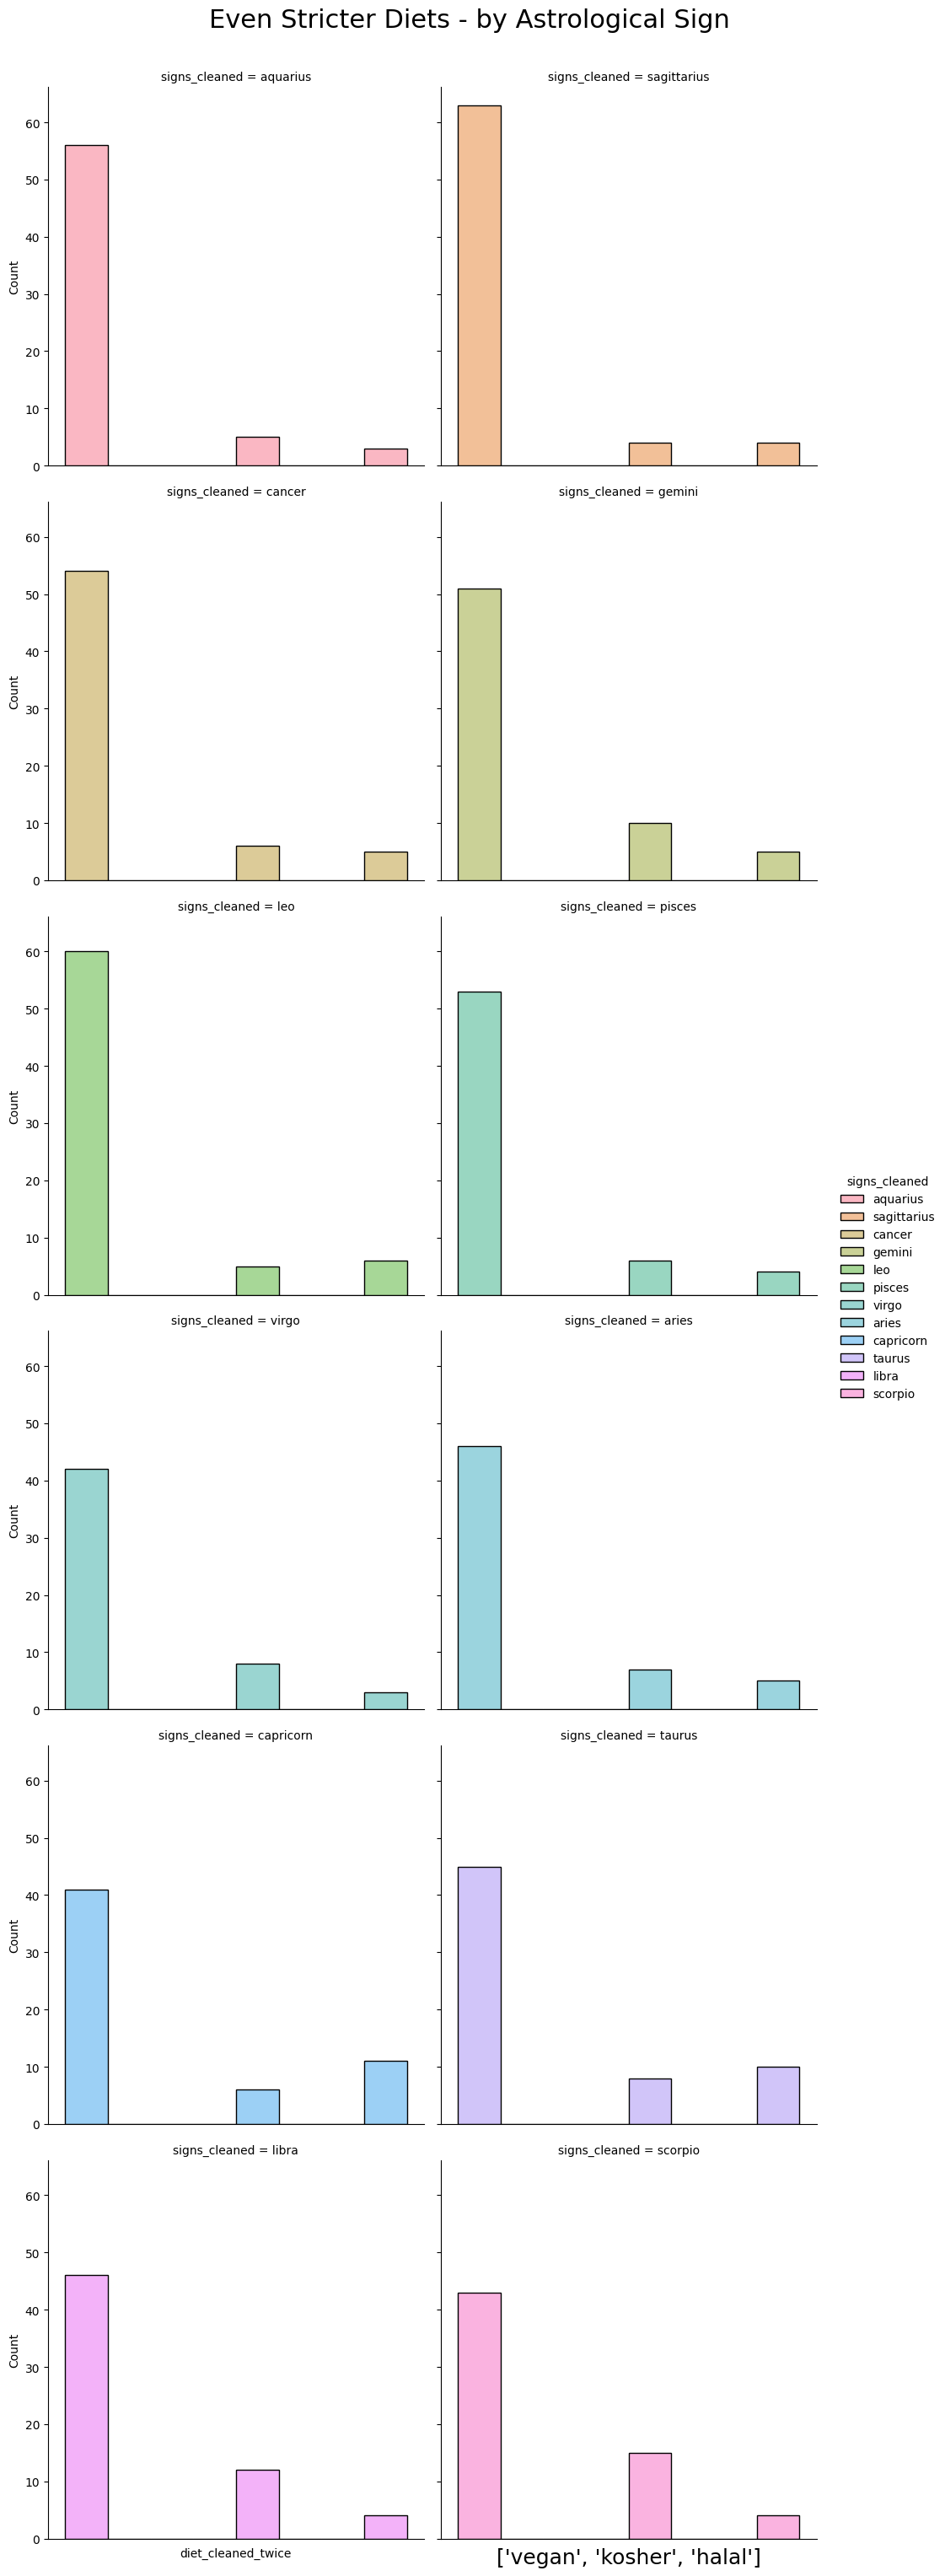

In [376]:
diet_labels = ["vegan","kosher","halal"]


ax = sns.displot(data=profiles.loc[profiles['diet_cleaned_twice']> 1], x="diet_cleaned_twice", hue="signs_cleaned", col="signs_cleaned",  col_wrap=2, binwidth=.25)


plt.suptitle('Even Stricter Diets - by Astrological Sign', size=22, y = 1.02)


plt.xlabel(diet_labels, size = 18)
plt.ylabel(ylabel= 'sign',  fontsize=16)
# Remove the numbers on the x axis.
ax.set(xticklabels=[])
# Remove x tick marks
ax.tick_params(axis='x', length=0)

plt.show()

#Scroll down in this next window to see all 12 graphs.

### Results of comparing Stricter Diets to Astrological signs.

#### VEGAN

#### Sagittarians represent the biggest vegan group by quite a bit. In second place for most-likely-to-be-vegan are the Leos.
#### Capricorns are least likely to be vegan. In second place, for least-likely-vegan is the Virgos.

#### KOSHER

#### Scorpios have a much higher rate of being kosher. In second place for most-likely-to-be-kosher are the Geminis.
#### Sagittarians are least likely to be kosher. In second place, for least-likely-to-be-kosher, we have a tie, going to Aquarius and Leo.

#### HALAL

#### Capricorn is far more likely to be halal. In second place, for most-likely-to-be-halal, is Taurus. Both Capricorn and Taurus are almost double as likely to be halal than any other sign.
#### Virgo and Aquarius are tied to be least-likely-to-be-halal. In second place for least-likely-to-be-halal, we have a 4-way tie, going to
#### Libra, Pisces, Scorpio, and Sagittarius.

### DRINKS

<Figure size 2200x8000 with 0 Axes>

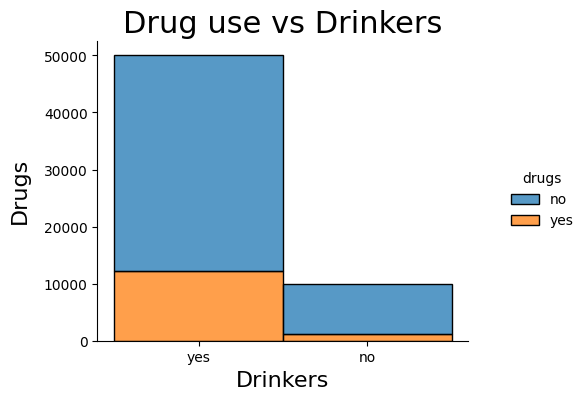

In [377]:
plt.figure(figsize=(22,80))

sns.displot(data=profiles, x="drinks", hue="drugs", kind="hist", binwidth = 3, multiple = "stack");
plt.xlabel('Drinkers', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.7)
plt.ylabel(ylabel= 'Drugs',  fontsize=16, labelpad=10)
#plt.legend(loc='upperleft')
plt.title('Drug use vs Drinkers', size=22)

plt.show()

### Users who do not drink, are far more likely to not do drugs.

### DRUGS

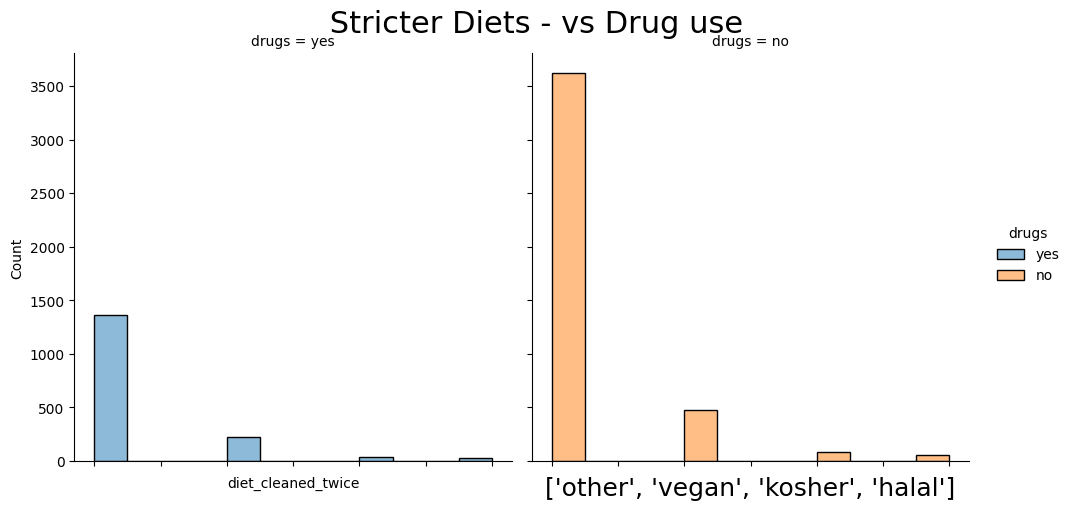

In [378]:
diet_labels = ["other", "vegan","kosher","halal"]


ax = sns.displot(data=profiles.loc[profiles['diet_cleaned_twice']> 0], x="diet_cleaned_twice", hue="drugs", col="drugs",  col_wrap=2, binwidth=.25)
# Remove the numbers on the x axis.
ax.set(xticklabels=[])

plt.suptitle(' Stricter Diets - vs Drug use', size=22, y = 1.02)


plt.xlabel(diet_labels, size = 18)
plt.ylabel(ylabel= 'drugs',  fontsize=16)

plt.show()

#### Those practicing vegan, kosher and halal diets have low instance of drug use, as compared to those who do not have a strict diet.

<Figure size 2200x8000 with 0 Axes>

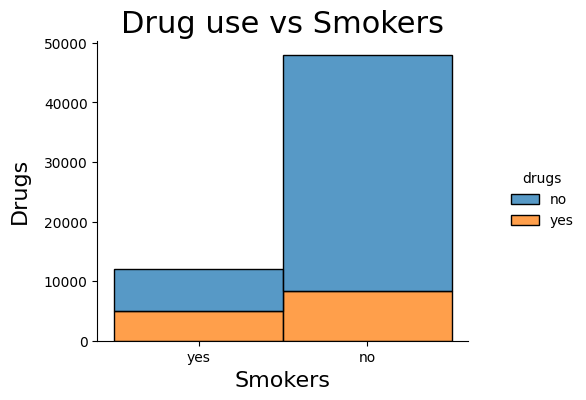

In [379]:
plt.figure(figsize=(22,80))

sns.displot(data=profiles, x="smokes", hue="drugs", kind="hist", binwidth = 3, multiple = "stack");
plt.xlabel('Smokers', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.7)
plt.ylabel(ylabel= 'Drugs',  fontsize=16, labelpad=10)
#plt.legend(loc='upperleft')
plt.title('Drug use vs Smokers', size=22)

plt.show()

### The non-smokers are far more likely to say no to drugs.

In [380]:
print(profiles.drinks.value_counts())

drinks
yes    50067
no      9879
Name: count, dtype: int64


### HEIGHT

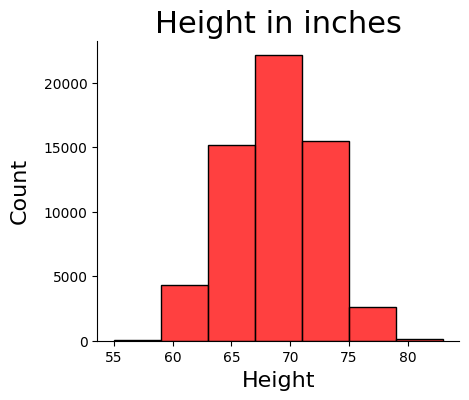

In [381]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 4, color="red");

plt.xlabel('Height', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.7)
plt.ylabel(ylabel= 'Count',  fontsize=16, labelpad=10)

plt.title('Height in inches', size=22)
plt.show()

In [382]:
print(profiles.height.mean())

68.30077069362426


#### The average height of users is 68.3 inches ( 5 feet 8.3 inches ).

### Let's compare height to income.  Is there a correlation?

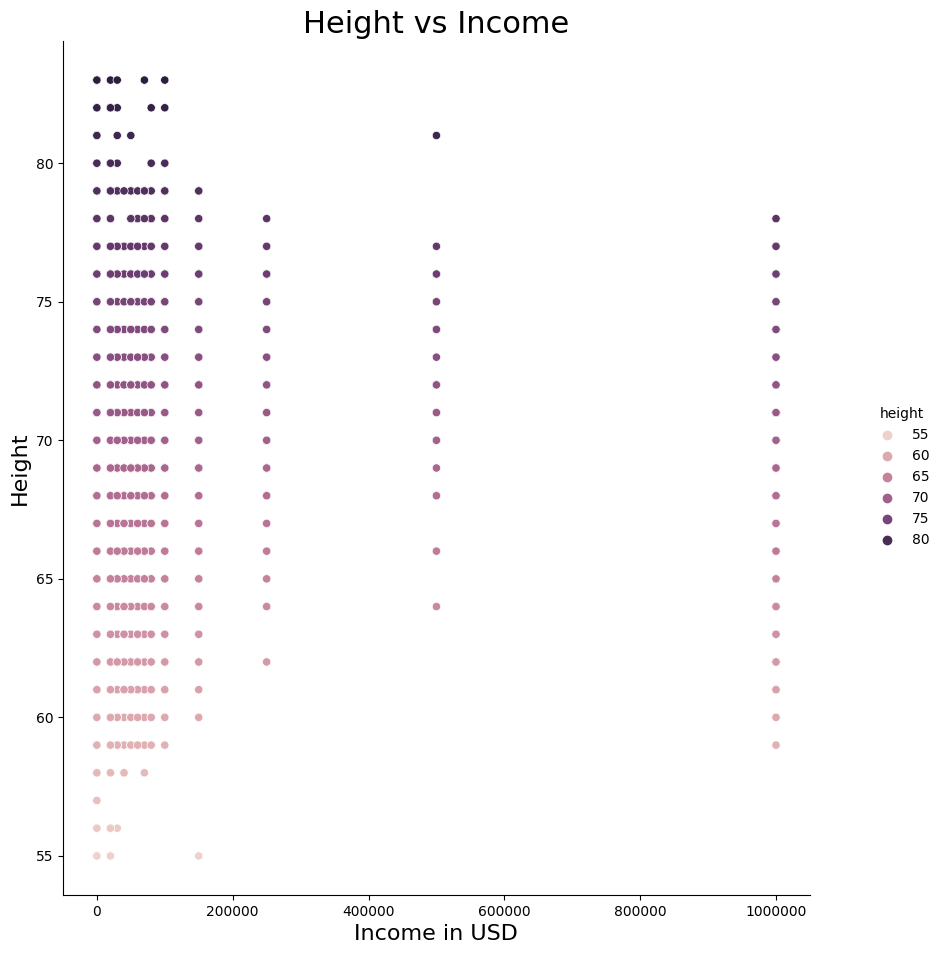

In [383]:


ax = sns.relplot(x='income', y='height', data=profiles, kind='scatter', hue = 'height')
ax.fig.set_size_inches(10,10)


plt.title("Height vs Income", size = 22)
plt.xlabel("Income in USD", size = 16)
plt.ylabel("Height", size = 16)

# to prevent scientific notation.
plt.ticklabel_format(style='plain')



#### A majority of the income level falls between users who are 67" - 72 ". (5 feet 7 inches to 6 feet)  
#### At the $50,000 income level, there is a slight adavantage to being tall. But, overall, there isn't a big correlation between height and income.

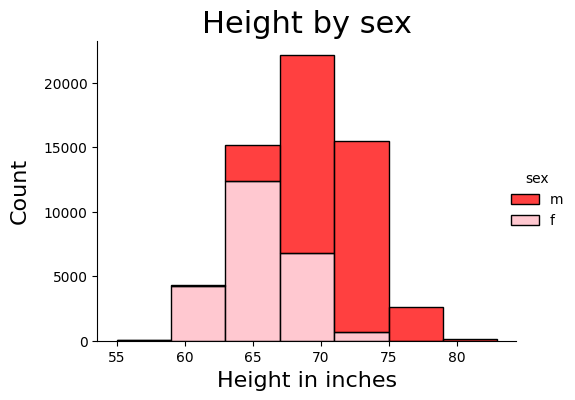

In [384]:
palette = ["#FF0000", "#FFB6C1"]
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 4, multiple = "stack", palette=sns.color_palette(palette, len(palette)));
plt.xlabel('Height in inches', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.7)
plt.ylabel(ylabel= 'Count',  fontsize=16, labelpad=10)
plt.title('Height by sex', size=22)
plt.show()

#### Most female users are 65 inches tall ( 5 feet 5 inches ).

### INCOME

### I want to see if there is a correlation between income level, and those users who practice a stricter diet.

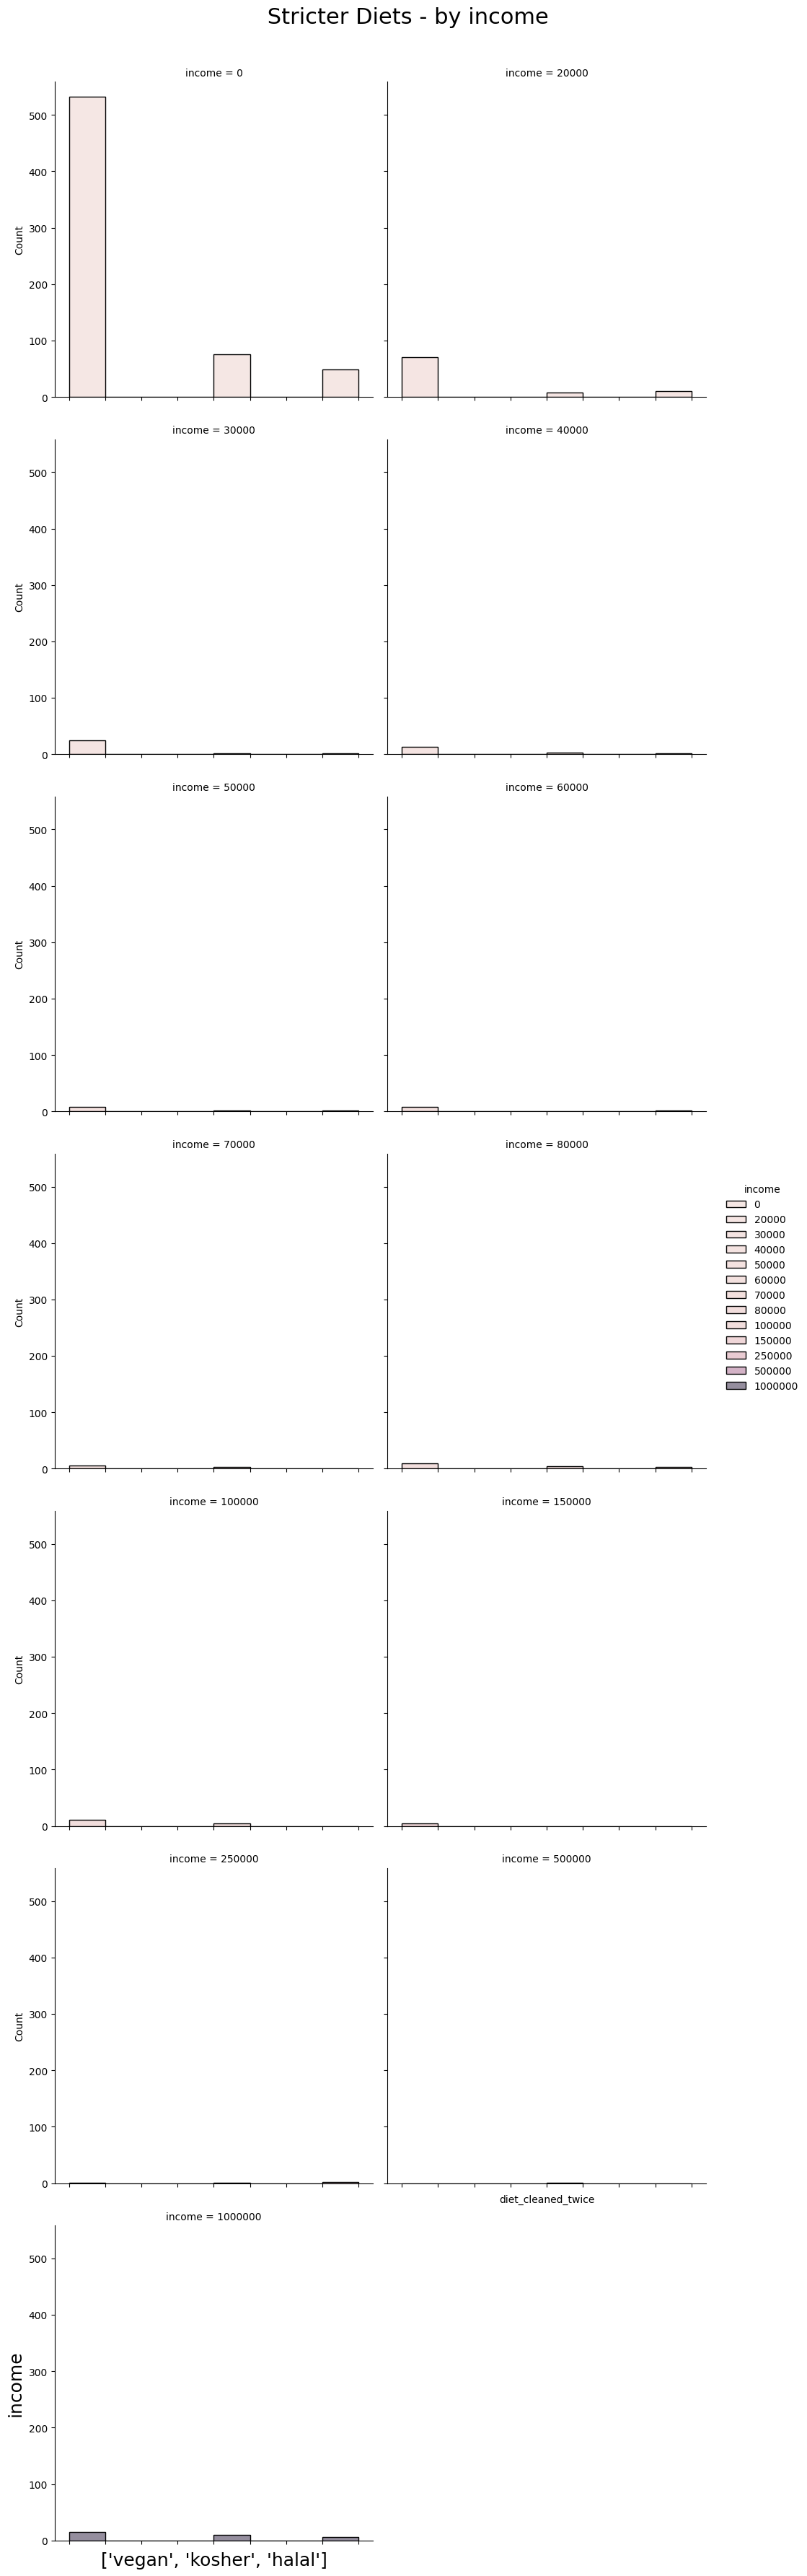

In [385]:
diet_labels = ["vegan","kosher","halal"]

ax = sns.displot(data=profiles.loc[profiles['diet_cleaned_twice']> 1], x="diet_cleaned_twice", hue="income", col="income", col_wrap=2, binwidth=.25)

plt.suptitle(' Stricter Diets - by income', size=22, y = 1.02)
ax.set(xticklabels=[])

plt.xlabel(diet_labels, size = 18)

plt.ylabel(ylabel= 'income',  fontsize=18)

plt.show()

<Axes: xlabel='diet_cleaned', ylabel='income'>

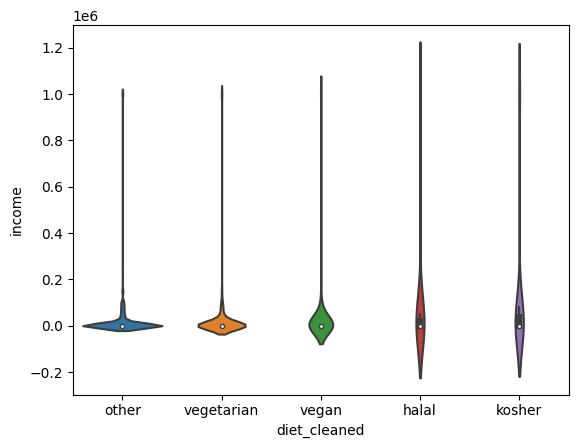

In [386]:
sns.violinplot(data=profiles, x='diet_cleaned', y='income')

#### Users practicing halal diets have the highest income In second place is kosher, and 3rd place vegan. However, there is not enough variance in the income values, as most users entered 0 (zero). There is not a strong correlation between stricter diets and income.

Text(0, 0.5, 'Income')

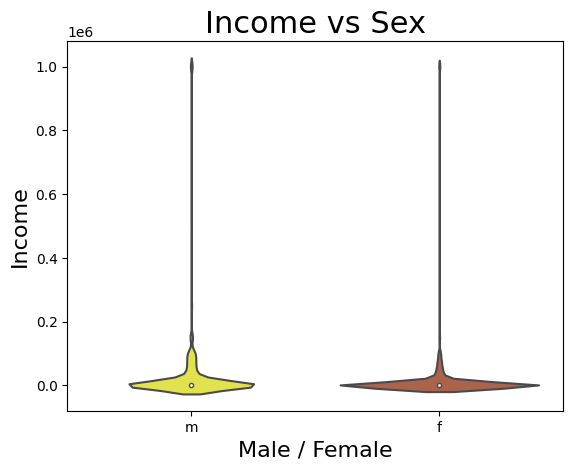

In [387]:
palette2 = ["#FAFA37", "#BA5B3C"]
sns.violinplot(data=profiles, x='sex', y='income', palette= palette2)
plt.title("Income vs Sex", size = 22)
plt.xlabel("Male / Female", size = 16)
plt.ylabel("Income", size = 16)

#### There is not enough data to analysis income vs sex, because most users entered 0 (zero) for income.

### SEX

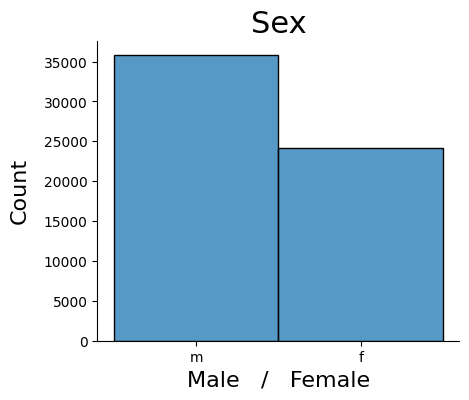

In [388]:
sns.displot(data=profiles, x="sex", kind="hist", binwidth = 5);
plt.xlabel('Male   /   Female', fontsize=16);
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.7)
plt.ylabel(ylabel= 'Count',  fontsize=16, labelpad=10)
plt.title('Sex', size=22)
plt.show()

In [389]:
male_count = profiles['sex'].value_counts()['m']
print(male_count)

35829


In [390]:
female_count = profiles['sex'].value_counts()['f']
print(female_count)

24117


In [391]:
print(male_count / len(profiles.sex))

0.5976879191272145


In [392]:
print(female_count / len(profiles.sex))

0.4023120808727855


#### 60% of users are MALE and 40% are FEMALE.

### SIGN

Text(0.5, 1.0, 'Distribution of Astrological Sign vs Income')

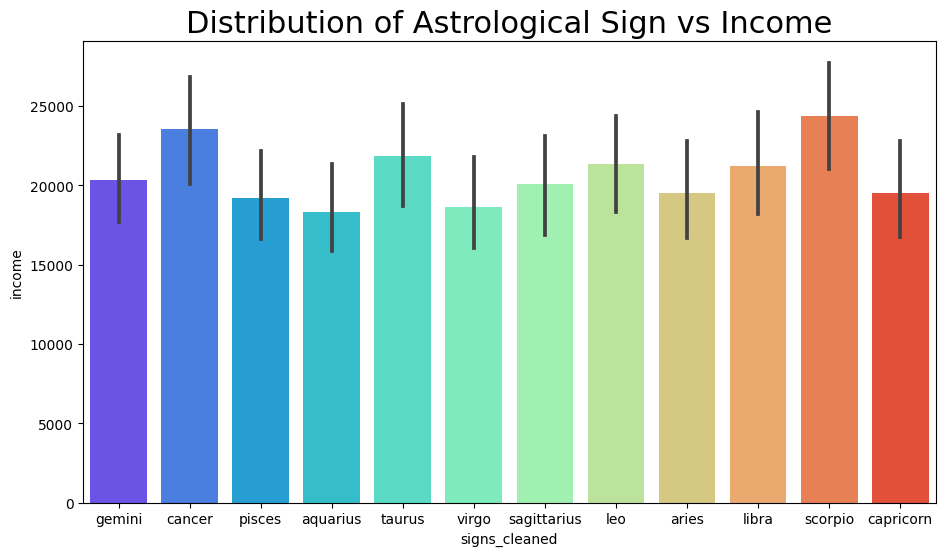

In [393]:
plt.figure(figsize=(11,6))
sns.barplot(x='signs_cleaned', y='income', data=profiles, palette='rainbow')
plt.title("Distribution of Astrological Sign vs Income", size =22)

#### Scorpios are the winner for highest income. In second place, for highest-income, is cancer. Aquarius has the lowest income. In second place, for lowest-income is virgo.

### SMOKES

In [394]:
print("Of the " + str(len(profiles.smokes)) + " users, " + str(profiles['smokes'].value_counts()['yes'] ) + " are smokers.")

Of the 59946 users, 11977 are smokers.


In [395]:
smokers_percent = profiles['smokes'].value_counts()['yes']  / len(profiles.smokes) * 100

In [396]:
print(str(round(smokers_percent, 2) ) + " % of the users are smokers.")

19.98 % of the users are smokers.


Text(0.5, 1.0, 'Distribution of Smokers vs Income')

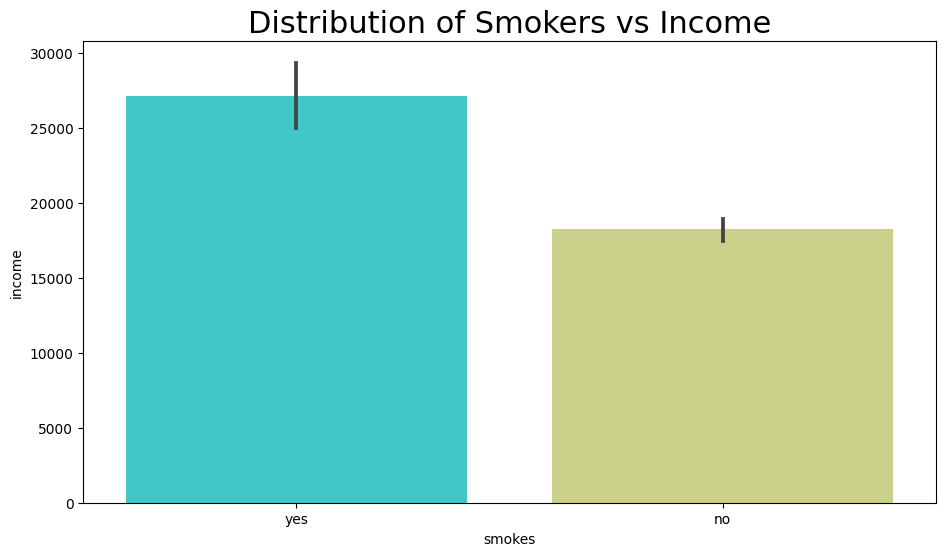

In [397]:
plt.figure(figsize=(11,6))
sns.barplot(x='smokes', y='income', data=profiles, palette='rainbow')
plt.title("Distribution of Smokers vs Income", size =22)

#### Surprisingly, smokers have the highest income, and non-smokers have the lowest income.

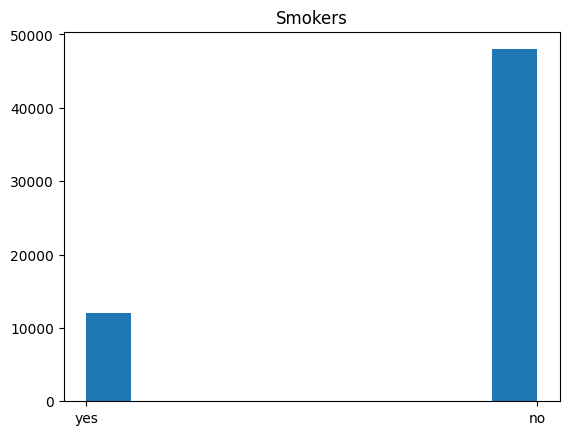

In [398]:
plt.hist(profiles.smokes)
plt.title("Smokers")
plt.show()

#### The number of non-smokers greatly outweight that of smokers.

### Status

In [399]:
print(profiles.status.head(20))

0             single
1             single
2          available
3             single
4             single
5             single
6             single
7             single
8             single
9             single
10         available
11    seeing someone
12            single
13            single
14            single
15            single
16            single
17            single
18            single
19            single
Name: status, dtype: object


In [400]:
print("There are " + str(profiles.status.nunique()) + " different status answers." + '\n')

print(profiles.status.value_counts())
print('\n' + "There are " + str(len(profiles.status)) + " total number of answers.")
print(profiles.status.count())
print('\n' + "Less than 1% of the registered users on this app are married:")
print(310 / profiles.status.count())
print('\n' + "%92 of the registered users on this app are single.")
print(55697 / profiles.status.count())

There are 5 different status answers.

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64

There are 59946 total number of answers.
59946

Less than 1% of the registered users on this app are married:
0.005171320855436559

%92 of the registered users on this app are single.
0.9291195409201615


#### 92% of users are single.

## Machine Learning

### Using Machine Learning to make predictions.
### Can I predict high / low income, based on Astrological Sign?
### Can I predict whether or not a user has a strict diet, based Astrological Sign?
### Can I predict Drug Use based on Astrological sign?
### Can I predict Drug Use based on whether or not a user is a smoker?

In [401]:
# use pandas .get_dummies method to create one new column for each astrological sign
signs_encoded = pd.get_dummies(profiles['signs_cleaned'])

# join the new columns back onto the existing dataframe. This will add 13 new columns.
profiles = profiles.join(signs_encoded)

#### Astrological Signs have been "encoded", so that now each sign has it's own column.

In [402]:
print(profiles.head(10))

   age       body_type               diet drinks drugs  \
0   22  a little extra  strictly anything    yes    no   
1   35         average       mostly other    yes   yes   
2   38            thin           anything    yes   yes   
3   23            thin         vegetarian    yes   yes   
4   29        athletic              other    yes    no   
5   29         average    mostly anything    yes    no   
6   32             fit  strictly anything    yes    no   
7   31         average    mostly anything    yes    no   
8   24         average  strictly anything    yes    no   
9   37        athletic    mostly anything     no    no   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white      75       0   
1              working on space camp                white      70   80000   
2     graduated from masters program                  NaN      68       0   
3      working on college/university                w

## <font color='red'>  Test / Train / Split </font>

In [403]:
col_length = len(profiles.columns)
print(col_length)

42


### <font color='blue'>Selecting Data for 1st Model. Smokes vs Stricter Diets.</font>

In [404]:
print(profiles.diet_cleaned_binary.value_counts())

diet_cleaned_binary
0    59052
1      894
Name: count, dtype: int64


In [405]:
print(profiles.smokes_numeric.value_counts())

smokes_numeric
0    47969
1    11977
Name: count, dtype: int64


In [406]:
# y are the labels. X is the feature.
y = profiles['smokes_numeric']
X = profiles['diet_cleaned_binary']

In [407]:
# X is the column diet_cleaned_binary
X.head()

0    0
1    0
2    0
3    0
4    0
Name: diet_cleaned_binary, dtype: object

In [408]:
# y is the smokes column
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smokes_numeric, dtype: int64

In [409]:
print(X.shape)
print(y.shape)

(59946,)
(59946,)


### <font color='red'>Selecting Data for 2nd and 3rd models. Aquarius vs Income. and Sagittarius vs Stricter Diet</font>

#### Splitting the Astrological Signs and the Stricter Diets  data... 

In [410]:
# Selecting Data for 2nd Model. Astrological Signs vs Stricter Diets.
# y are the labels. X is the feature.

y_aquarius = profiles['aquarius']
y_aries = profiles['aries']
y_cancer = profiles['cancer']
y_capricorn = profiles['capricorn']
y_gemini = profiles['gemini']
y_leo = profiles['leo']
y_libra = profiles['libra']
y_pisces = profiles['pisces']
y_sagittarius = profiles['sagittarius']
y_scorpio = profiles['scorpio']
y_taurus = profiles['taurus']
y_virgo = profiles['virgo']

X_income = profiles['income_binary']
X_strict_diet = profiles['diet_cleaned_binary']
#X_strict_diet = profiles['diet_cleaned_twice']
# y_signs = profiles[['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 'libra','pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo']]

In [411]:
print(y_aquarius.shape)

(59946,)


In [412]:
print(X_strict_diet.shape)

(59946,)


In [413]:
X_income = profiles['income']
print(X_income.shape)

(59946,)


### <font color='red'> Selecting Data for 4th Model. Scorpio vs Drugs. </font>

In [414]:
print(profiles.drugs_numeric.value_counts())

drugs_numeric
0    46588
1    13358
Name: count, dtype: int64


In [415]:
X_drugs = profiles['drugs_numeric']
print(X_drugs.shape)

(59946,)


### <font color='red'> Selecting Data for 5th Model.  Smokes vs Drugs. </font>

In [416]:
y_drugs = profiles['drugs_numeric']
X_smokes = profiles['smokes_numeric']

### <font color='blue'> Splitting the Smokes data and the Stricter Diets data <font color='blue'>  ...

In [417]:
# Selecting Data for 1st Model. y is the target. X is the feature.

val_size = 0.25
# # Spliting data for Logistic Model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_size, random_state = 7)

#### The ( smokes / stricter diet ) data has been split 25% / 75%

In [418]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44959,), (14987,), (44959,), (14987,))

In [419]:
X_train.value_counts(dropna=False)

diet_cleaned_binary
0    44286
1      673
Name: count, dtype: int64

In [420]:
X_test.value_counts(dropna=False)

diet_cleaned_binary
0    14766
1      221
Name: count, dtype: int64

In [421]:
y_train.value_counts(dropna=False)

smokes_numeric
0    35978
1     8981
Name: count, dtype: int64

In [422]:
y_test.value_counts(dropna=False)

smokes_numeric
0    11991
1     2996
Name: count, dtype: int64

### <font color='blue'> Reshape the Diet data</font>

In [423]:
# Reshape diet data 
#from numpy import array
X_trained = X_train.values.reshape(-1, 1)

In [424]:
# Reshape the diet
X_tested = X_test.values.reshape(-1, 1)

### Splitting <font color='red'> Aquarius</font>  vs Income

In [425]:
# Selecting Data for the Aquarius Model. y is the target. X is the feature.

val_size = 0.25
# Spliting data for Logistic Model.
X_train_aquar, X_test_aquar, y_train_aquar, y_test_aquar = train_test_split(X_income, y_aquarius, test_size = val_size, random_state = 7)

In [426]:
X_train_aquar.shape, X_test_aquar.shape, y_train_aquar.shape, y_test_aquar.shape

((44959,), (14987,), (44959,), (14987,))

### Reshape the <font color='red'> Aquarius</font> data

In [427]:
# Reshape diet Aquarius data 
X_train_aquar_reshape = X_train_aquar.values.reshape(-1, 1)

In [428]:
y_test_aquar_reshape = y_test_aquar.values.reshape(-1, 1)

###  Splitting <font color='red'> Sagittarius</font> vs Diet

In [429]:
print(X_strict_diet.value_counts())

diet_cleaned_binary
0    59052
1      894
Name: count, dtype: int64


In [430]:
# Selecting Data for the Sagittarius Model. y is the target. X is the feature.

val_size = 0.25
# Spliting data for Logistic Model.
X_train_sag, X_test_sag, y_train_sag, y_test_sag = train_test_split(X_strict_diet, y_sagittarius, test_size = val_size, random_state = 7)

In [431]:
X_train_sag.shape, X_test_sag.shape, y_train_sag.shape, y_test_sag.shape

((44959,), (14987,), (44959,), (14987,))

### Reshape the <font color='red'> Sagittarius</font> data

In [432]:
# Reshape diet Aquarius data 
X_train_sag_reshape = X_train_sag.values.reshape(-1, 1)

In [433]:
y_test_sag_reshape = y_test_sag.values.reshape(-1, 1)

In [434]:
print(y_test_sag_reshape.shape)

(14987, 1)


### Splitting <font color='red'> Scorpio</font> vs Drugs

In [435]:
print(X_drugs.value_counts())

drugs_numeric
0    46588
1    13358
Name: count, dtype: int64


In [436]:
# Selecting Data for the Scorpio Model. y is the target. X is the feature.

val_size = 0.25
# Spliting data for Logistic Model.
X_train_scorp, X_test_scorp, y_train_scorp, y_test_scorp = train_test_split(X_drugs, y_scorpio, test_size = val_size, random_state = 7)

### Reshape the <font color='red'> Scorpio </font> data

In [437]:
# Reshape the Scorpio data 
X_train_scorp_reshape = X_train_scorp.values.reshape(-1, 1)

In [438]:
y_test_scorp_reshape = y_test_scorp.values.reshape(-1, 1)

### Splitting <font color='red'> Smokes vs Drugs </font> 

In [439]:
print(y_drugs.value_counts())

drugs_numeric
0    46588
1    13358
Name: count, dtype: int64


In [440]:
# Selecting Data for the Smokes vs Drugs. y is the target. X is the feature.

val_size = 0.25
# Spliting data for Logistic Model.
X_train_smokes_, X_test_smokes_, y_train_drugs_, y_test_drugs_ = train_test_split(X_smokes, y_drugs, test_size = val_size, random_state = 7)

### Reshape the <font color='red'> Drugs and Smokes </font> data

In [441]:
# Reshape the smokes and drugs data 
X_train_smokes_reshape_ = X_train_smokes_.values.reshape(-1, 1)

In [442]:
y_test_drugs_reshape_ = y_test_drugs_.values.reshape(-1, 1)

## <font color='red'> Logistic Regression. Fit the models.<font > 

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Fit the <font color='blue'>  Smokes vs Stricter Diet </font>  model

In [444]:
from sklearn.linear_model import LinearRegression
model = LogisticRegression()

model.fit(X_trained, y_train)

LogisticRegression()

#### The model for Strict Diet vs Smokes has been fit.

### Get prediction score.

In [445]:
predictions = model.predict(X_tested)
model.score(X_tested, y_test)

0.8000934142923868

#### The model has correctly predicted the outcome, 79% of the time, on whether or not someone with a strict diet is a smoker.

### Fit the <font color='red'>  Aquarius </font> Astrological Sign vs Income

In [446]:
model_aquar = LogisticRegression()

model_aquar.fit(X_train_aquar_reshape, y_train_aquar)

LogisticRegression()

#### The model for Income vs Aquarius has been fit.

In [447]:
predictions2 = model_aquar.predict(y_test_aquar_reshape)
model_aquar.score(y_test_aquar_reshape, y_test_aquar)

0.9368786281443918

### Get prediction score.

#### The model has correctly predicted the outcome, 93% of the time, on whether or not an Aquarius has an income lower than $30,000.

### Fit the <font color='red'>  Sagittarius </font> Astrological Sign vs Stricter Diet model

In [448]:
model_sag = LogisticRegression()

model_sag.fit(X_train_sag_reshape, y_train_sag)

LogisticRegression()

#### The model for Strict Diet vs Sagittarius has been fit.

In [449]:
predictions3 = model_sag.predict(y_test_sag_reshape)
model_sag.score(y_test_sag_reshape, y_test_sag)

0.9377460465736972

### Get prediction score.

#### The model has correctly predicted the outcome, 93% of the time, on whether or not a Sagittarius has a strict diet.

### Fit the <font color='red'>  Scorpio </font> Astrological Sign vs Drugs

In [450]:
model_scorp = LogisticRegression()

model_scorp.fit(X_train_scorp_reshape, y_train_scorp)

LogisticRegression()

#### The model for Income vs Scorpio has been fit.

In [451]:
predictions4 = model_scorp.predict(y_test_scorp_reshape)
model_scorp.score(y_test_scorp_reshape, y_test_scorp)

0.9302729031827583

### Get the score.

#### The model has correctly predicted the outcome, 93% of the time, on whether or not a Scorpio does drugs.

### Fit the <font color='red'>  Smokes vs Drugs</font>  model 

In [452]:
model_smokesDrugs = LogisticRegression()

model_smokesDrugs.fit(X_train_smokes_reshape_, y_train_drugs_)

LogisticRegression()

#### The model for Smokes vs Drugs has been fit.

In [453]:
predictions5 = model_scorp.predict(y_test_drugs_reshape_)
model_scorp.score(y_test_drugs_reshape_, y_test_drugs_)

0.7732034429839194

### Get the score.

#### The model has correctly predicted the outcome, 77% of the time, on whether or not a smoker does drugs.

# <font color='red'>  CONCLUSION </font>

### Can I predict high / low income, based on Astrological Sign? <font color='red'>  Yes.</font>

### Can I predict whether or not a user has a strict diet, based Astrological Sign? <font color='red'>  Yes.</font>

### Can I predict Drug Use based on Astrological sign? <font color='red'>  Yes.</font>

### Can I predict Drug Use based on whether or not a user is a smoker? <font color='red'>  Yes.</font>

### There are 59,946 users in the OK Cupid dataset. 8% of users are not single.  shhhh.

### AGE

#### The average age of OK Cupid users is 32. The highest age is 69.

### DIET

### Of the 59,946 users, 4986 are vegetarian. This is 8% of the users.

### Of the 59,946 users, only 894 practice a strict diet ( for this project, "strict diet" means vegan, kosher, and halal. Vegetarian was not included in the "strict diet".)  1.4 % of the users practice a strict diet.

### DRINKS

### 79% of the users are drinkers.

### DRUGS

### 22% of the users use drugs. <font color='red'>  Users who do not drink, are far more likely to not do drugs. Those practicing a stricter diet ( vegan, kosher,  halal ) have low instance of drug use, as compared to those who do not have a strict diet. </font>

### HEIGHT

### The average height of users is 68 inches ( 5 feet 8 inches ). There does not seem to be a correlation on bigger income vs how tall a person is.

### INCOME

### <font color='red'>  Users practicing halal diets have the highest income. </font>

### SMOKES

### The average age of users who are smokers is 26 years old. The number of smokers greatly outweighs that of non-smokers. The non-smokers are far more likely to say no to drugs. Surprisingly though, <font color='red'> smokers, by far, have a higher income, </font> by about $10,000.

### SEX

### 60% of the users are male, and 40% are female.

### SIGN 

### There is a correlation between a persons sign, and the level of their income. <font color='red'>  Scorpios are the winner for highest income. </font> In second place, for highest-income, is cancer. These are both water signs. Aquarius has the lowest income. In second place, for lowest-income is virgo.

### Comparing Stricter Diets to Astrological Signs:

### VEGAN 
### <font color='red'>  Sagittarians represent the biggest vegan group by quite a bit. </font>In second place for most-likely-to-be-vegan are the Leos.

### <font color='red'>  Capricorns are least likely to be vegan. </font>In second place, for least-likely-vegan is the Virgos.

### KOSHER

### <font color='red'>  Scorpios have a much higher rate of being kosher. </font>In second place for most-likely-to-be-kosher are the Geminis.

### <font color='red'>  Sagittarians are least likely to be kosher.</font> In second place, for least-likely-to-be-kosher, we have a tie, going to Aquarius and Leo.

### HALAL

### <font color='red'>  Capricorn is far more likely to be halal. </font>In second place, for most-likely-to-be-halal, is Taurus. Both Capricorn and Taurus are almost double as likely to be halal than any other sign. Both are Earth signs.

### <font color='red'>  Virgo and Aquarius are tied to be least-likely-to-be-halal.</font> In second place for least-likely-to-be-halal, we have a 4-way tie, going to

### Libra, Pisces, Scorpio, and Sagittarius.

## So, to sum this up... if you're Scorpio, and you practice halal diet, and you're a smoker, you probably have a higher income than most people.